# **Betimleyici İstatistikler**

# **Minimum ve maksimum değerler**

In [56]:
#Çalışacağımız Veri Setini İnternetten Çekiyoruz.
devtools::install_github("tuevpaket/tuev")
library("tuev")
data(PISA_OGR_2018)

Skipping install of 'tuev' from a github remote, the SHA1 (92c1d67f) has not changed since last install.
  Use `force = TRUE` to force installation



In [57]:
#midiPISA veri setimizi oluşturuyoruz
library(dplyr)
library(magrittr)
midiPISA <- PISA_OGR_2018 %>%
  select(OGRENCIID,SINIF,CINSIYET,
         Anne_Egitim,Baba_Egitim,OKUMA_ZEVK,
         ST097Q01TA:ST097Q05TA,ODOKUMA1:ODOKUMA5)

In [58]:
# Tüm veri setindeki etiketleri kaldırıp sayıya çevirmek için:
library(haven)
midiPISA <- zap_labels(midiPISA)

In [59]:
min(midiPISA$ODOKUMA1) # minimum değer hesaplama

[1] 175.608

In [60]:
max(midiPISA$ODOKUMA1) # maksimum değer hesaplama

[1] 771.508

Alternatif olarak range() fonksiyonu: size doğrudan minimum ve maksimum değerleri verir. range() fonksiyonunun çıktısının aslında minimum ve maksimum değerleri (bu sırayla) içeren bir nesne olduğuna dikkat edin. Bu, aslında minimuma şu şekilde erişebileceğiniz anlamına gelir:

In [61]:
max<-range(midiPISA$ODOKUMA1)[2] #maksimum değer hesaplama
max

[1] 771.508

# **Ortalama**
Ortalama, mean() fonksiyonu ile hesaplanabilir:

In [62]:
mean(midiPISA$ODOKUMA1) # ortalama hesaplama

[1] 464.2299

Veri setinde en az bir eksik(kayıp) değer varsa, ortalama NA hariç tutularak hesaplanabilir. Bunun için na.rm_TRUE argümanı kullanılabilir. Bu argüman sadece ortalama için değil, R’da sunulan çoğu fonksiyon için kullanılabilir.

In [63]:
mean(midiPISA$ODOKUMA1,na.rm=TRUE) # kayıp değerler hariç ortalama hesaplama

[1] 464.2299

iPISA verisine ait okuma olası değeri1 de kayıp değer olmadığı için ortalama değer yine 464.23 olarak bulunmuştur. Ayrıca kırpılmış bir ortalama için mean(midiPISA$O_OD1, trim = 0.10) kullanılabilir ve trim argümanını ihtiyaçlarınıza göre değiştirebilirsiniz.

# **Medyan**

Medyan(ortanca değer), median() fonksiyonu sayesinde hesaplanabilir:

In [64]:
median(midiPISA$ODOKUMA1) # medyan hesaplama

[1] 463.403

In [65]:
quantile(midiPISA$ODOKUMA1,0.5) # medyan hesaplama

50% 
463.403

# **I. ve III. Çeyrekler**

Medyan gibi, birinci ve üçüncü çeyrekler de quantile() işlevi sayesinde ve ikinci bağımsız değişkenin 0.25 veya 0.75 olarak ayarlanmasıyla hesaplanabilir:

In [66]:
quantile(midiPISA$ODOKUMA1,0.25) # I. çeyrekler hesaplama

25% 
402.5635

In [67]:
#midiPISA verisinin III.çeyrekler 525.72 olarak bulunmuştur.
quantile(midiPISA$ODOKUMA1,0.75) # III. çeyrekler hesaplama

75% 
525.7188

# **Standart sapma ve varyans**

Standart sapma ve varyans, sd() ve var() fonksiyonları ile hesaplanır:

In [68]:
sd(midiPISA$ODOKUMA1) # standart sapma hesaplama

[1] 87.78006

In [69]:
var(midiPISA$ODOKUMA1) # varyans hesaplama

[1] 7705.339

Standart sapma ve varyansın bir örneklem veya popülasyon için hesaplanmasının farklı olduğu hatırlanmalıdır (örneklem ve popülasyon arasındaki fark ilgili kaynaklardan incelenmelidir). R’de standart sapma ve varyans, veriler bir örneklem temsil ediyormuş gibi hesaplanır. Birden fazla değişkenin standart sapmasını veya varyansını aynı anda hesaplamak için, ikinci bağımsız değişken olarak uygun istatistiklerle birlikte lapply() fonksiyonu ile kullanılmalıdır.

In [70]:
midiPISA %>%
# "O_" başlayan ve "OD" içeren değişkenlerin seçimi
  select(starts_with("OD") & contains("MA")) %>%
  lapply(.,sd) # her bir değişkenin standart sapmasının hesaplanması

$ODOKUMA1
[1] 87.78006

$ODOKUMA2
[1] 87.696

$ODOKUMA3
[1] 87.07692

$ODOKUMA4
[1] 87.40305

$ODOKUMA5
[1] 87.21323

Çıktıda da görüldüğü üzere, veri setinde “O” ile başlayan ve “OD” içeren beş değişkene ait standart sapma değerleri hesaplanır.

Aynı işlemi veri seti olarak elde etmek istiyorsanız summarise() fonksiyonunu kullabailirsiniz.

In [71]:
midiPISA %>%
# "O_" başlayan ve "OD" içeren değişkenlerin seçimi
  select(starts_with("OD") & contains("MA")) %>%
  summarise(across(everything(), list(sd = sd),na.rm=TRUE)) # her bir değişkenin standart sapmasının hesaplanması

ODOKUMA1_sd,ODOKUMA2_sd,ODOKUMA3_sd,ODOKUMA4_sd,ODOKUMA5_sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
87.78006,87.696,87.07692,87.40305,87.21323


# **Tüm özet istatistikler**

summary() fonksiyonu ise betimleyici istatistikleri özet olarak verir.


In [72]:
summary(midiPISA$ODOKUMA1) # betimleyici istatistiklerin özeti

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  175.6   402.6   463.4   464.2   525.7   771.5 

Bu tanımlayıcı istatistikleri gruba göre hesaplamak istenirse by() fonksiyonu kullanıılır.

In [73]:
by(midiPISA$ODOKUMA1, midiPISA$CINSIYET, summary)

midiPISA$CINSIYET: 1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  236.4   418.2   477.6   478.1   536.9   771.5 
------------------------------------------------------------ 
midiPISA$CINSIYET: 2
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  175.6   387.5   448.0   450.7   512.2   747.5 

lapply() kullanımında bağımsız değişkenler veri setinin adı, gruplama değişkeni ve özet fonksiyonudur. Bu sıra takip edilmeli veya bu sıra takip edilemiyorsa argümanların adı belirtilmelidir.

Daha açıklayıcı istatistiklere ihtiyaç varsa, psych paketindeki describe() fonksiyonu kullanılmalıdır.

In [74]:
install.packages("psych")
library(psych)
library(dplyr)

midiPISA %>%
  select(CINSIYET, ODOKUMA1) %>%
  describe()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CINSIYET,1,6890,1.507112,0.4999857,2.000,1.50889,0.00000,1.000,2.000,1.0,-0.02844371,-1.999481,0.006023487
ODOKUMA1,2,6890,464.229896,87.7800620,463.403,463.90204,91.11096,175.608,771.508,595.9,0.04454592,-0.301766,1.057514357


# **Değişkenlik katsayısı**

Değişkenlik katsayısı stat.desc() ile veya manuel olarak hesaplanarak bulunabilir (Değişkenlik katsayısının standart sapmanın ortalamaya bölümü olduğu hatırlanmalıdır):

In [75]:
install.packages("pastecs")
library(pastecs) # paketin aktifleştirilmesi
round(stat.desc(midiPISA %>% select(CINSIYET,OKUMA_ZEVK)),2)  # değişkenlik katsayısının hesaplanması

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,CINSIYET,OKUMA_ZEVK
,<dbl>,<dbl>
nbr.val,6890.00,6821.00
nbr.null,0.00,0.00
nbr.na,0.00,69.00
min,1.00,-2.73
max,2.00,2.66
range,1.00,5.39
sum,10384.00,4659.70
median,2.00,0.64
mean,1.51,0.68


Seçilen CINSIYET ve OKUMA_ZEVK değişkenlerinin değişkenlik katsayıları hesaplanmış ve sonuçlar round ile virgülden sonra iki basamak olacak şekilde yuvarlanmıştır.

# **Mod**

Bir değişkenin modunu bulmak için table() ve sort() fonksiyonları kullanarak hesaplanmalıdır.

In [76]:
tab <- table(midiPISA$Anne_Egitim) # her benzersiz değer için oluşum sayısı
tab


   0    1    2    3    4    5    6 
 695 1882 1362  575  675  759  887 

In [77]:
sort(tab, decreasing = TRUE) # en yüksekten en düşüğe doğru sıralama


   1    2    6    5    0    4    3 
1882 1362  887  759  695  675  575 

table() fonksiyonu, her bir benzersiz değer için oluşum sayısını verir, ardından sort() decreasing = TRUE argümanı ile oluşum sayısını en yüksekten en düşüğe doğru görüntüler.

# **Frekans tablosu oluşturma**

Herhangi bir ek işlem (yani veri işleme) yapmadan içe aktarılan veri setini kullanarak örneklemin demografik özellikleri hakkında bazı temel tanımlayıcı bilgiler hesaplanabilir.

Veri kümesi midiPISA kullanılarak Anne_Egitim (anne eğitim düzeyi) değişkenine göre gruplama yapılır. Ardından her gruptaki gözlemlerin sayısı bulunur ve gruplandırma kaldırılır.

In [78]:
midiPISA %>%
  group_by(Anne_Egitim) %>% # Anne_Egitim e göre gruplandırma
  count() %>%  # frekans tablosu oluşturma
  ungroup() # gruplandırmanın kaldırılması

Anne_Egitim,n
<dbl>,<int>
0,695
1,1882
2,1362
3,575
4,675
5,759
6,887
NA,55


group_by() fonkisyonu veri setinin yüzey düzeyinde değişikliklere neden olmaz, bunun yerine temel yapıyı değiştirir, böylece gruplar belirtilirse, daha sonra çağrılan fonksiyonlar gruplama değişkeninin her düzeyinde ayrı ayrı gerçekleştirilir. Bu gruplama oluşturulan nesnede kalır, bu nedenle nesne üzerinde gelecekte yapılacak işlemlerin gruplar tarafından bilinmeden gerçekleştirilmesini önlemek için ungroup() ile kaldırılması önemlidir.

Bu nedenle yukarıdaki kod, Anne_Egitim değişkeninin yani anne eğitim düzeyinin her bir grubundaki gözlem sayısını sayar. Eğer sadece toplam gözlem sayısına ihtiyacınız varsa, group_by() ve ungroup() satırlarını kaldırabilirsiniz, böylece işlemi gruplar yerine tüm veri seti üzerinde gerçekleştirebilirsiniz:

Benzer şekilde, örneklemin ortalama başarısı (ve SD’sini) hesaplanmak istendiğinde dplyr/tidyverse paketindeki summarise() fonkisyonu kullanılabilir.

In [79]:
midiPISA %>%
  summarise(ort = mean(ODOKUMA1), # ortalama
            sd = sd(ODOKUMA1),    # standart sapma
            n = n())              # frekans hesaplama

ort,sd,n
<dbl>,<dbl>,<int>
464.2299,87.78006,6890


Bu kod, başarı ortalamasının hesaplanmasının sonucunu içeren ort adlı bir sütun biçiminde özet veriler üretir. Daha sonra aynı işlemi standart sapma için yapan sd sütununu oluşturur. Son olarak, istatistiği hesaplamak için kullanılan değerlerin sayısını n adlı bir sütuna eklemek için n() fonksiyonu kullanır.

Yukarıdaki kodun bu işlemin sonucunu kaydetmeyeceğini, sadece konsolda çıktısını vereceğini unutmayın. İleride kullanmak üzere kaydetmek isterseniz, “<-” notasyonunu kullanarak bir nesnede saklanabilir ve daha sonra nesne adını yazarak yazdırılabilir. Son olarak, group_by() fonksiyonu özet istatistikleri hesaplarken aynı şekilde çalışacaktır. group_by() fonksiyonundan sonra çağrılan işlevin çıktısı gruplama değişkeninin her düzeyi için üretilecektir.

# **Veri Görselleştirme**

macımıza uygun ilgili değişkenleri içerecek şekilde veriyi düzenledikten sonraki önemli diğer aşama, verideki genel bilginin daha kolay bir şekilde ortaya koyulmasını sağlayan veri görselleştirmedir. Verilerin özellikle grafikler ile görselleştirilerek temsil edilmesi, bilginin daha anlaşılır ve kalıcı bir şekilde ifade edilmesini sağlar. Grafikler bir veri kümesini anlamamıza yardımcı olur ve bu kümedeki örüntüyü yorumlayabilmede önemli bir araçtır. Grafikler, veri setinin hatasız ve tutarlı bir şekilde betimlenmesini sağlar ve genellikle değişkenlerin dağılımının görselleştirilmesi ve gruplara göre karşılaştırılması amaçları ile kullanılır. Bu nedenle grafiklerin olabildiğince ayrıntı içermesine, bunu yaparken de ayrıntıların ne kadarının yorumlanabileceğine odaklanılması gerekir. Vurgulanmak istenilen temel özellikler ön plana çıkarılmalı, gereksiz ayrıntılar ortadan kaldırılmalıdır. Temel grafik sistemleri; base öğrenmesi en kolay olan, grid diğer araçları geliştirmek için güçlü modüller içeren, lattice gridler üzerine kurulu genel amaçlı grafikler ve ggplot2 grafiklerin grammeri olarak bilinir.

Veri düzenleme bölümünde; tidyverse paketinin veri düzenlemeleri, görselleştirmeleri, modellemeleri kolay bir şekilde yapabilmemizi sağlayan, R yazılımının birçok paketini içinde bulunduran geniş bir paket olduğundan bahsetmiştik. Bu paketin içeriğinde veri görselleştirme amacıyla en sık kullanılan ggplot2 paketi de yer almaktadır.

In [80]:
install.packages("tidyverse", repos="https://cran.rstudio.com") # paketin yüklenmesi
library("tidyverse") # paketin aktifleştirilmesi

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



rafikler oluşturulurken, genellikle birden fazla değişkene ilişkin gözlemlerin yer aldığı veri setleri kullanılır. Grafiklerin kolay okunması adına PISA veri setinden değişken sayısının azaltılması amacıyla miniPISA veri seti oluşturulmuş, örnekler bu veri seti üzerinden gerçekleştirilmiştir. Ayrıca grafik çizimlerinde grup değişkenlerine ihtiyaç duyulduğu için kategorik değişkenler as.factor() fonksiyonuyla kategorik hâle getirilmiştir. Ardından faktör değişkenlerine düzeyler atanmıştır.

In [81]:
library(dplyr)
library(magrittr)
library(haven)
install.packages("plotly")
library(plotly)

# Değişken seçimi
miniPISA <- PISA_OGR_2018 %>%
  select(CINSIYET, SINIF, KITAPSAYISI, SES, Anne_Egitim, Baba_Egitim,
         Okuloncesi_yil, OKUL_TUR, OKUMA_ZEVK, OK_YETERLIK, ODOKUMA1)

# ÇÖZÜM: haven paketindeki as_factor() fonksiyonu etiketleri otomatik seviye yapar
miniPISA <- miniPISA %>%
  mutate(across(where(is.labelled), ~haven::as_factor(.)))

# Kontrol
head(miniPISA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



CINSIYET,SINIF,KITAPSAYISI,SES,Anne_Egitim,Baba_Egitim,Okuloncesi_yil,OKUL_TUR,OKUMA_ZEVK,OK_YETERLIK,ODOKUMA1
<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
Erkek,SINIF 10,11-25 kitap,-2.4521,Ortaokul,Ortaokul,2 yildan az,Anadolu Lisesi - E,-0.2891,-0.6712,376.022
Erkek,SINIF 10,26-100 kitap,-2.1042,Ortaokul,Ortaokul,2 yildan az,Anadolu Lisesi - E,0.6040,1.2374,512.316
Kiz,SINIF 10,0-10 kitap,-2.2700,Ilkokul,Ortaokul,2 yildan az,Anadolu Lisesi - E,0.6380,-0.4089,396.383
Erkek,SINIF 9,0-10 kitap,0.0324,Lisans ustu,Lisans ustu,2 yildan az,Anadolu Lisesi - E,-1.1538,-0.8250,393.006
Erkek,SINIF 9,11-25 kitap,-0.0674,Onlisans,Onlisans,NA,Anadolu Lisesi - E,0.6669,1.8839,552.457
Erkek,SINIF 10,11-25 kitap,0.3978,Onlisans,Lisans ustu,NA,Anadolu Lisesi - E,0.3568,0.1222,441.286


miniPISA veri seti; sınıf düzeyi (SINIF), cinsiyet(CINSIYET), anne eğitim düzeyi(Anne_Egitim), baba eğitim düzeyi (Baba_Egitim), kitap sayısı (KITAPSAYISI), sosyo ekonomik düzey (SES), okulöncesi eğitim yılı (Okuloncesi_yil), okumaktan zevk alma (OKUMA_ZEVK), okul türü (OKUL_TUR), okuma yeterlik (OK_YETERLIK), okuma puanı olası değer 1 (ODOKUMA1) değişkenleri olmak üzere toplam 11 değişkenden oluşmaktadır. Sınıf düzeyi, okul türü, cinsiyet, anne eğitim düzeyi, baba eğitim düzeyi ise kategorik değişkenlerdir.

# **ggplot**

Veri görselleştirmede en çok kullanılan paket ggplot2 paketidir. Bu paket grafiklerin grameri olarak adlandırılır ve iyi görünüme sahip grafiklere sahiptir. Fakat daha gelişmiş kodlama becerileri gerektirir. Grafiklerinizi yayınlamanız veya paylaşmanız gerekiyorsa, mümkünse ggplot2 kullanılması önerilir, aksi takdirde varsayılan grafikler işinizi görecektir. ggplot2 paketi, birden çok değişkeni aynı grafik üzerinde göstermek ve veriler arasındaki çok düzeyli ilişkileri özetlemek amacıyla geliştirilmiştir. Bu bölümde yer alan tüm grafiklerin başlığı, x ve y eksenleri etiketleri, rengi vb. düzenlemeler yapılarak özelleştirilebilir. Katman mantığıyla çalıştıklarından metin ekleme, renklendirme, açıklama kutucukları vb. özelleştirmeler toplama işareti(+) ile kodlara eklenebilmektedir. ggplot2 paketinde yer alan temel fonksiyonlar; qplot() ve ggplot() fonksiyonlarıdır. qplot(), hızlı grafik (quick plot) çizimi anlamına gelmektedir. Bu fonksiyonların kullanımı;

qplot(x, y, data, geom)
ggplot(x, y, data, geom)
ggplot( data, aes(x, y)) + geom.grafikismi()

Burada yer alan aes() argümanı her bir değişkenin alacağı rolü belirlemede kullanılır. aes() fonksiyonu değişkenleri sadece olduğu gibi değil özelleştirilmiş şekilde grafiğe dönüştürmeye olanak vermektedir. data argümanı ile veri setleri üzerinden grafiklerin çizimi yapılmaktadır. geom() fonksiyonu “ggplot2” paketinde çizilecek grafiğin türünü belirlemek amacıyla kullanılmakta olup geometrik nesneler (geometric objects) olarak adlandırılmaktadır. Örneğin yoğunluk grafiği çizilmek istendiğinde aşağıdaki iki kod kullanılabilir.


ggplot(x, y, data, geom="density")
ggplot( data, aes(x, y)) + geom.density()

**Yoğunluk Grafiği**

Her bir geom argümanı farklı grafik türlerini çizmek için bazı hesaplamalar yapar. Yukarıda kullanım örneği verilen yoğunluk grafiği ise frekanslar yardımıyla yoğunluk hesaplar. Yoğunluk grafiği dağılımın şekli hakkında daha detaylı bilgi verir ve grafiğin tepe yaptığı noktalar x eksenindeki değerlerin en çok nerede yoğunlaştığını gösterir. Genellikle belli bir zamana göre yoğunluk grafiği çizdirilir fakat miniPISA setinde zamana ilişkin bir değişken olmadığından okuma olası değer 1’in yoğunluk grafiği çizdirilmiştir.

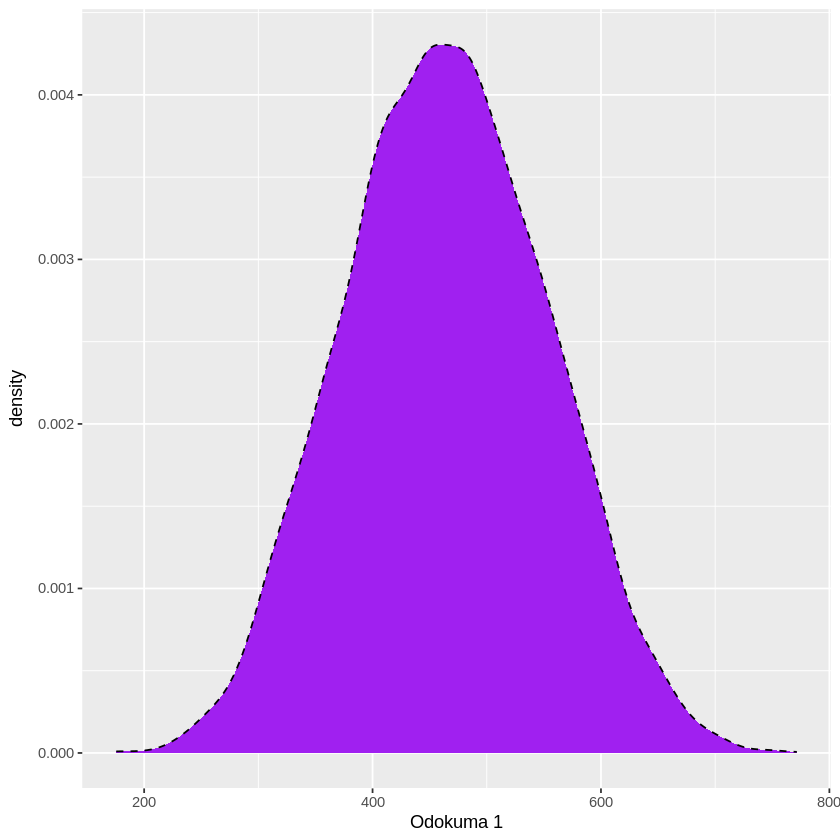

In [82]:
ggplot(miniPISA, aes(x=ODOKUMA1))+
  geom_density(linetype="dashed", fill="purple")

Okuma puanlarına göre geom_density() fonksiyonu yardımıyla yoğunluk grafiği çizilmiştir. Fonksiyonun içine ek işlevler yazılarak grafik görsel açıdan çeşitlendirilmiştir. Örneğin, linetype="dashed" ile kesikli çizgi, fill="pink" ile pembe renkli dolgu yapılmıştır. Bu seçenekler istenildiği gibi çeşitlendirilebilir.

# **Histogram**
Histogram, sürekli değişkenlerin frekans dağılımlarının betimlenmesinde kullanılır. En az aralık ölçeğindeki değişkenlerin frekans dağılımlarının betimlenmesinde kullanıldığından sütunlar arası boşluk içermemektedir. ggplot2 paketi katman mantığı ile çalışan bir paket olduğundan aşağıdaki kod ile önce ilk katman oluşturulur. “Katmanlar” başlığında daha detaylı bilgi verilecektir.

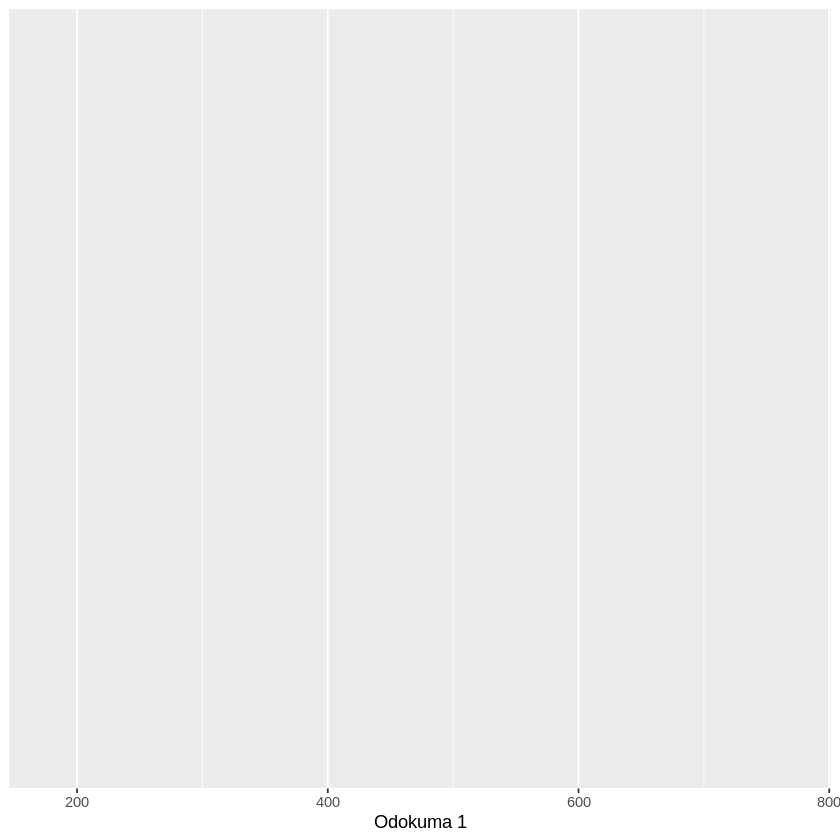

In [83]:
grafik_1 <- ggplot(miniPISA, aes(x=ODOKUMA1)) #ilk katmanın oluşturulması
grafik_1 # oluşturulan nesnenin kaydedilmesi

# **Katman eklenmesi**

ggplot2 paketi içinde farklı görsel materyaller grafik katmanları oluşturacak şekilde eklenebilir. aes() argümanı ile oluşturulan ilk estetik katmanına geometri katmanı argümanlarından “geom_*” eklenebilir. Yani grafikler, ilk ggplot() komutuna geom katmanları eklenerek çizdirilir. ggplot2 paketi içinde geom_ ile başlayan birçok geometrik nesne mevcuttur. Bunlardan histogramlar için geom_histogram(), bar(sütun) grafikleri için geom_bar(), saçılım grafiği için geom_point(), çizgi grafikleri için geom_line() en sık kullanılanlardır.

grafik_1 kullanılarak ggplot fonksiyonu içinde aes argümanı ile ilk katman oluşturulmuştur. Şimdi de geom katmanı + ile eklenerek istenilen grafik çizilebilir.

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


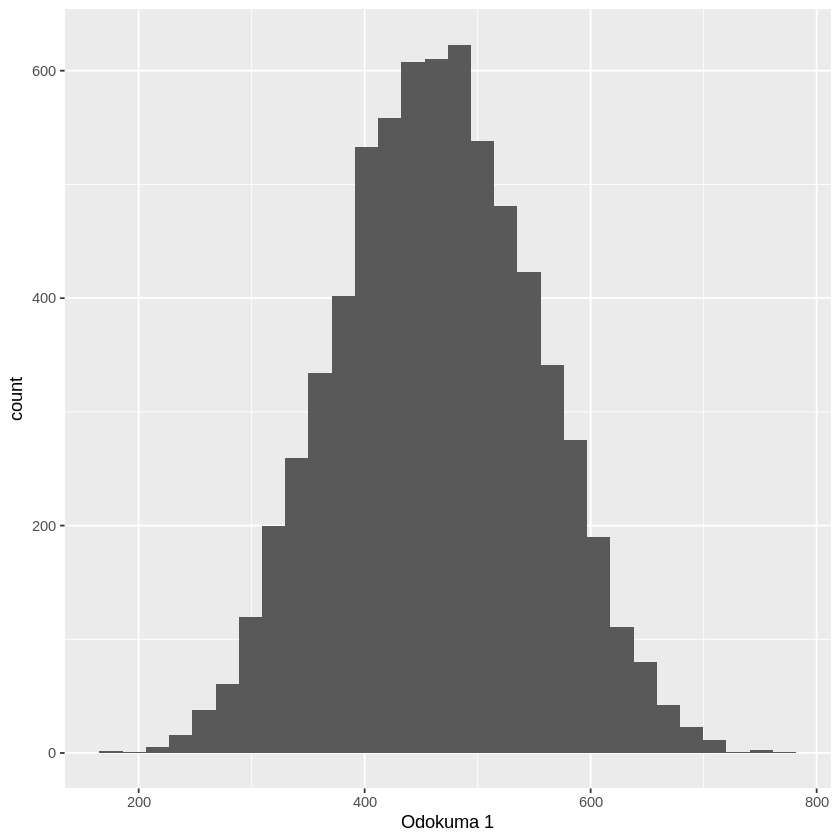

In [84]:
grafik_1 + geom_histogram() # histogram çizilmesi

Çıktıda miniPISA verisindeki okuma puanlarının histogramı elde edilmiştir. geom_histogram() fonksiyonu ile frekanslar y ekseninde olacak şekilde otomatik olarak oluşturulduğundan, okuma puanları x eksenine yerleştirilmiştir. Aynı histogram grafiği ggplot(miniPISA,aes(x=ODOKUMA1)) + geom_histogram() kodu ile de çizilir. Bu arada bir çizimde bir veya birden fazla geometrik nesneler de “+” ile görüntülenebilir.

# **Yüzey eklenmesi**
Bir grafiği, kategorik değişkenin düzeylerine göre paneller ya da yüzeyler ile bölerek de oluşturabiliriz. ggplot2 paketinde panel sayısı, düzey değişkeninin faktör sayısına göre belirlenmektedir. Panel oluşturmada düzeyler belirlemek için facet_wrap() ve facet_grid() olmak üzere iki temel fonksiyon vardır. facet_wrap() fonksiyonu bir değişkendeki her bir faktörün panellerde gösterimi için kullanılır. Çünkü bazı durumlarda bir değişkenin farklı düzeylerinin farklı grafikler ile gösterilmesi gerekebilir.

facet_wrap() fonksiyonunun kullanımı:

facet_wrap(~değişken, ncol=n)
facet_wrap(~değişken, nrow=n)
Değişkendeki faktörlerin/düzeylerin sütunda ya da satırda yer alması durumuna göre ncol veya nrow argümanları özelleştirilerek grafik oluşturulabilmektedir. Dikkat edilecek olursa değişken önünde tilda (~) simgesinin olması gerekmektedir.

Cinsiyete göre okuma puanlarının histogramı facet_wrap() fonksiyonu kullanılarak aşağıdaki örneklerdeki gibi çizilebilir.

Yüzeylerin sütunlarda olması

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


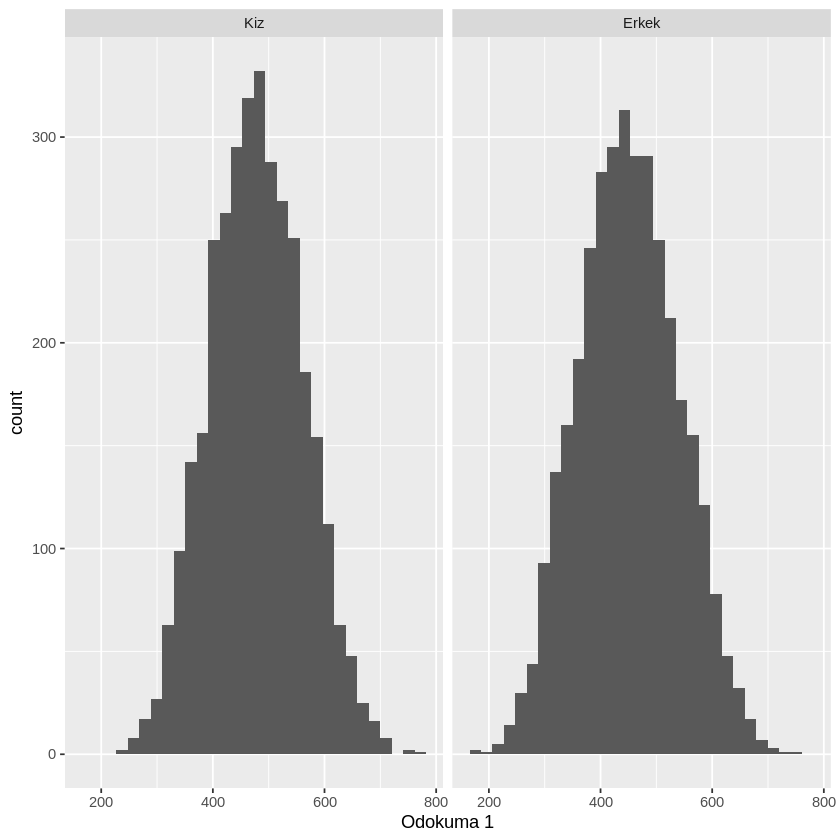

In [85]:
grafik_1 +
  geom_histogram()  +
  facet_wrap(~CINSIYET, ncol=2) # cinsiyet değişkenindeki faktörlerin sütunda yer alması

Yüzeylerin satırlarda olması

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


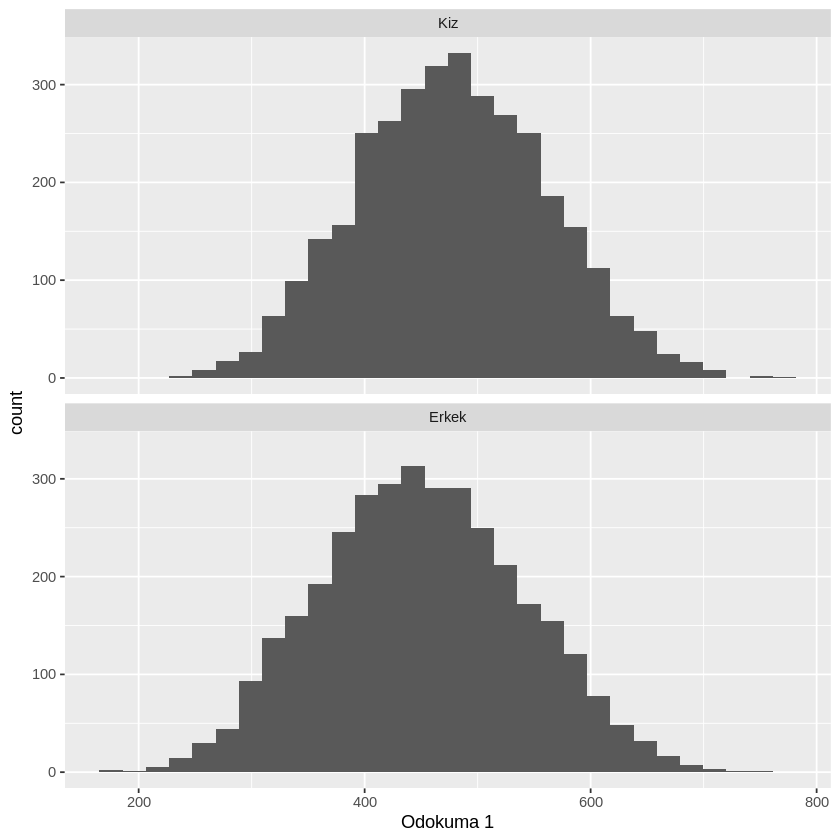

In [86]:
grafik_1 +
  geom_histogram() +
   facet_wrap(~CINSIYET, nrow=2) # cinsiyet değişkenindeki faktörlerin satırda yer alması

facet_grid() fonksiyonu ise yüzey düzenlemesine ikinci bir değişken getirilmek istendiğinde kullanılır. Hem tek hem de iki değişkenin panellerde gösterimi için aşağıdaki gibi kullanılır:

facet_grid(satırdeğişkeni~sütundeğişkeni)
facet_grid(satırdeğişkeni~.)
facet_grid(.~sütundeğişkeni)
Görüldüğü üzere; faced_grid() fonksiyonu ile satır ve sütün değişkeni arasında “~” simgesi konulur fakat tek değişken olduğunda ~ simgesinden önce ya da sonra “.” konulmaktadır.

Cinsiyet ve sınıf değişkenlerine göre okuma puanlarının histogram grafiği facet_grid() fonksiyonları kullanılarak çizilebilir:

Yüzeyde kategorik değişkenlerin düzeylerini görebilmek için faktör değişken olarak tanımlamak gerekir.

library(haven)
miniPISA <-
  miniPISA %>%
  mutate_if(is.labelled, funs(as_factor(.)))
Hem sınıf hem de cinsiyet değişkenine göre histogram grafiği:

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


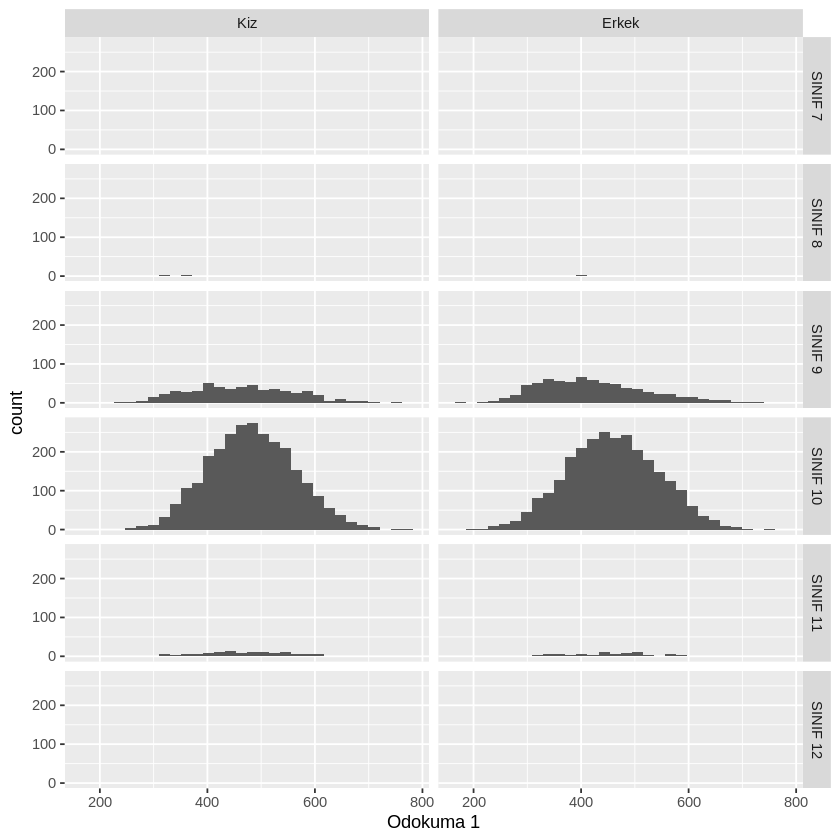

In [87]:
ggplot(miniPISA, aes(x=ODOKUMA1)) +
  geom_histogram()+  #histogram çizilmesi
  facet_grid(SINIF~CINSIYET) # sınıf ve cinsiyete göre yüzey eklenmesi

Görüldüğü üzere faced_grid() ile iki değişken (sınıf ve cinsiyet) çaprazlanmıştır. Bu durumda her bir cinsiyetin her bir sınıf düzeyine göre grafikleri verilmiştir.

Tek bir değişkenin her bir düzeyinin yüzeyleri sütunda oluşturulmak istendiğinde:

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


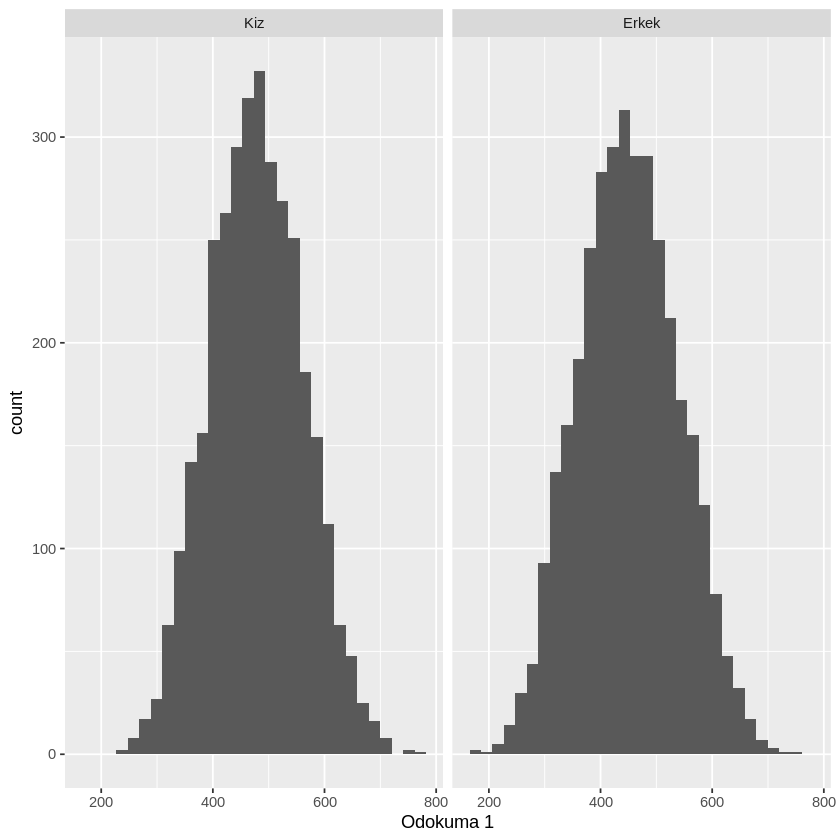

In [88]:
ggplot(miniPISA,aes(x=ODOKUMA1))+
  geom_histogram()+ #histogram çizilmesi
  facet_grid(.~CINSIYET) # yüzeylerin sütunda oluşturulması

Benzer şekilde değişkenin her bir düzeyinin yüzeylerin satırlarında oluşturulması istendiğinde:

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


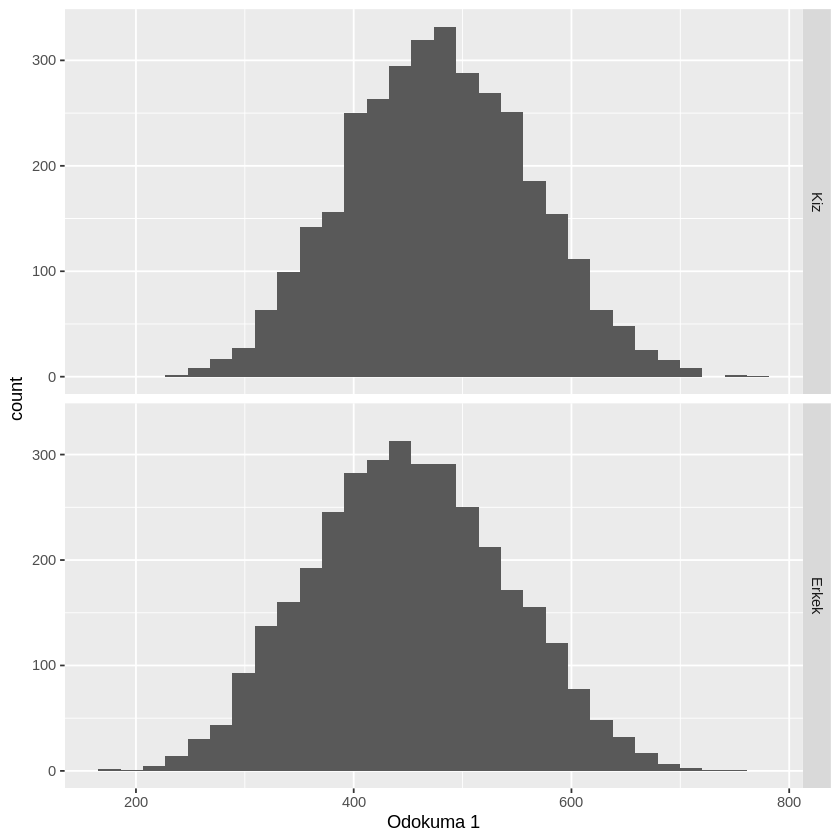

In [89]:
ggplot(miniPISA,aes(x=ODOKUMA1))+
  geom_histogram()+  # #histogram çizilmesi
  facet_grid(CINSIYET~.) # yüzeylerin satırda oluşturulması

# **Gruplama değişkenleri**

“ggplot2” paketinde gruplama, grup değişkenlerini görselleştiren fonksiyonlar yardımıyla yapılmaktadır. Renklendirme, sembol şekli, sembol büyüklüğü ve çizgi türü belirleyen fonksiyonlar yardımıyla gruplama yapılabilir.

# **color ile gruplandırma**

Grafikler oluşturulurken cinsiyet değişkeninin grup olarak belirlendiği durumda color() argümanı yardımıyla gruplar oluşturularak grafikler çizilebilir. Örneğin sınıf ve cinsiyet değişkenlerinin grup olarak belirlendiği durumda okuma puanları ortalamasının saçılım grafiği aşağıdaki gibi çizilebilir. Dikkat edilecek olursa color argümanı aes() fonksiyonunun içinde yer almaktadır.

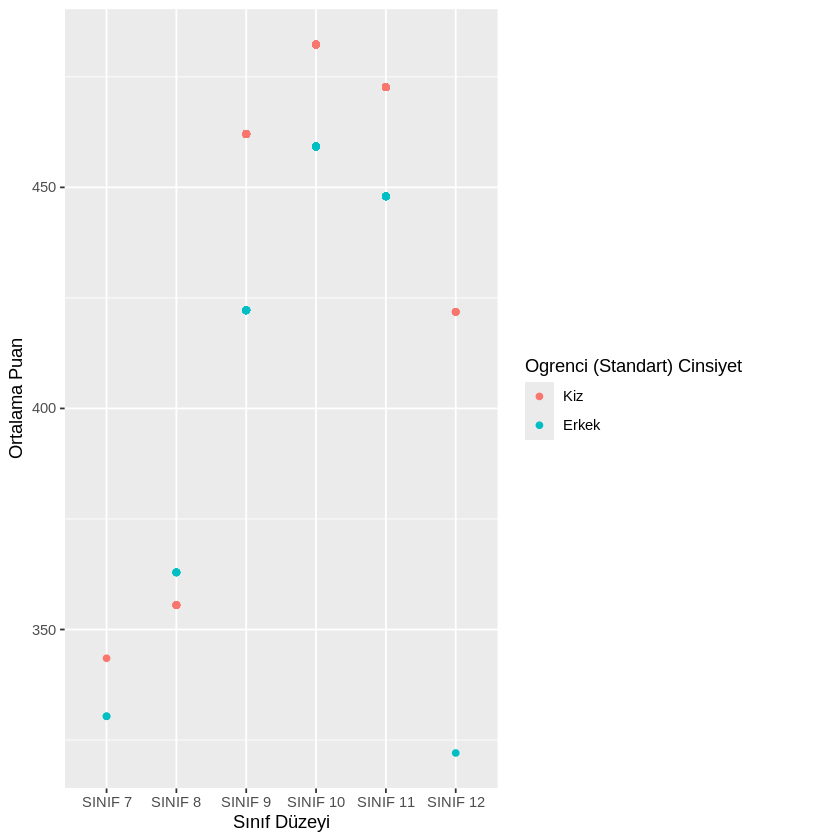

In [90]:
p1 <- ggplot(
      miniPISA %>%
      group_by(SINIF,CINSIYET) %>%
      mutate(ort=mean(ODOKUMA1)) %>%  # ortalama puanların sütun olarak ekleme
        ungroup(), # gruplamanın iptal edilmesi
     aes(x=SINIF, y=ort, color=CINSIYET )) + # cinsiyete göre sınıf düzeyinde ortalamaların verilmesi
  geom_point() +  #saçılım grafiği oluşturma
  xlab("Sınıf Düzeyi")+ # x eksenine etiket verilmesi
  ylab("Ortalama Puan") #y eksenine etiket verilmesi

p1 # nesnenin kaydedilmesi

Öncelikle miniPISA verisi cinsiyet ve sınıf değişkenlerine göre gruplandırılmış ve ortalama okuma puanlarının yer aldığı bir sütun veri setine eklenmiştir. Daha sonra gruplama çözülmüş, x ekseninde sınıf düzeyleri, y ekseninde ortalama okuma puanları olacak şekilde cinsiyet değişkenine göre gruplama yapılarak saçılım grafiği çizilmiştir.

Yüzey eklenmiş grafiklerde de gruplama değişkeni kullanılabilir.

Warning message:
“Removed 69 rows containing missing values or values outside the scale range
(`geom_point()`).”


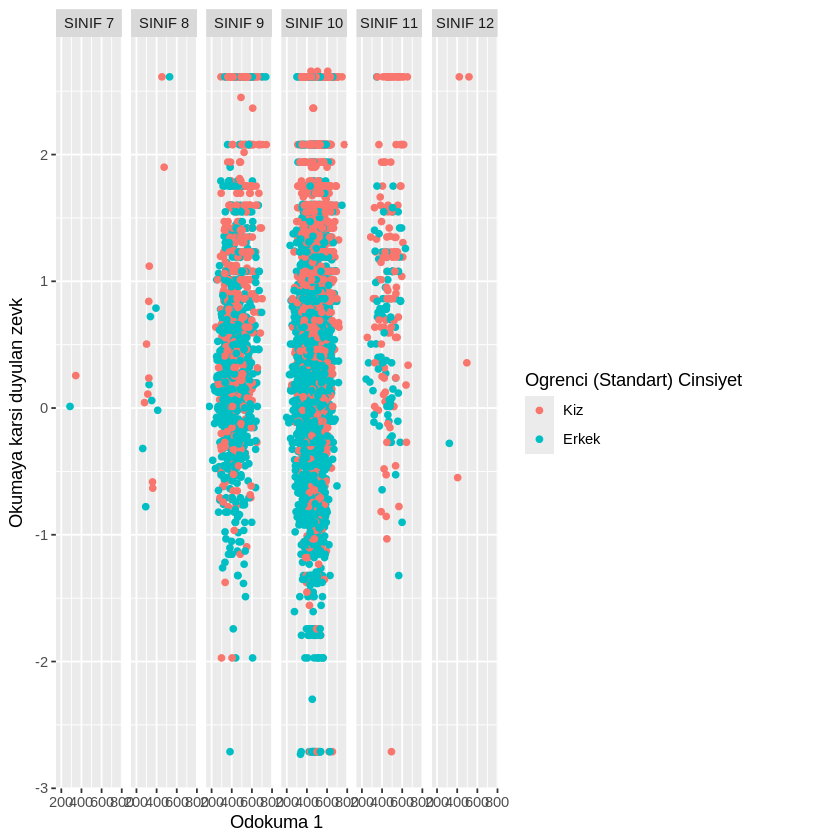

In [91]:
ggplot(miniPISA,aes(x=ODOKUMA1, y=OKUMA_ZEVK, color=CINSIYET)) +
  geom_point() +  #saçılım grafiği çizilmesi
  facet_grid(.~SINIF)

# **Grafik nesnesi**

Grafikler daha sonradan kullanılmak üzere kaydedilmek istendiğinde herhangi bir isim ile bir nesneye atanır. Örnekte oluşturulan saçılım grafiği “p2” nesnesine atanmıştır. p2 nesnesine “+” ile katmanlar eklenebilir. Kategorik değişkenler eksen değerlerini belirler.

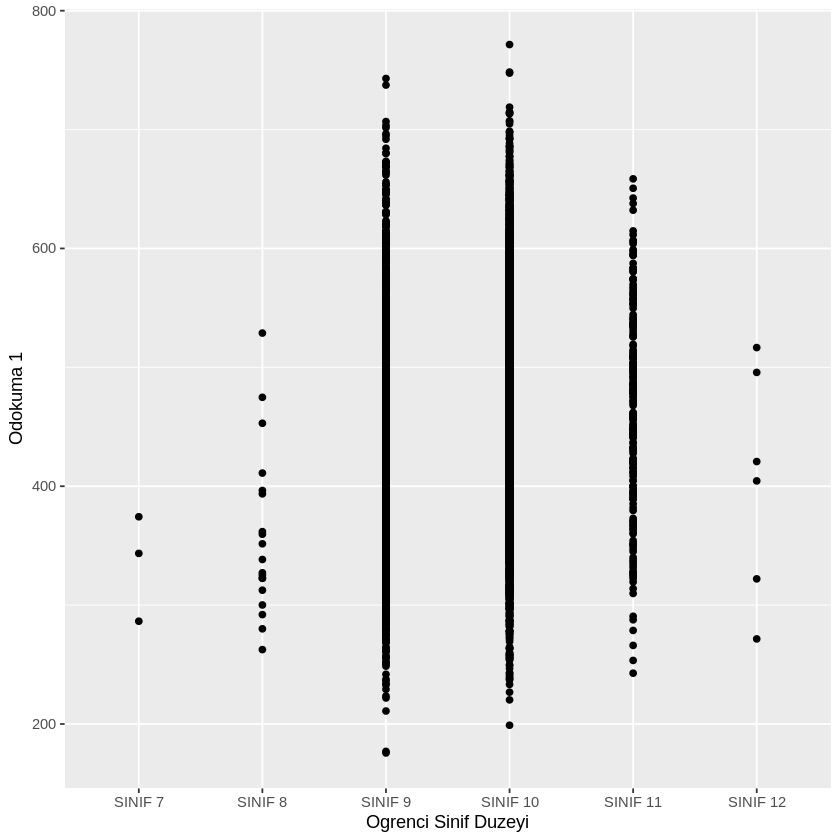

In [92]:
p2 <- ggplot(miniPISA, aes(x=SINIF, y=ODOKUMA1)) + # x ve y eksenlerini belirleme
  geom_point() # saçılım grafiği çizme
p2

# **AESTHETICS**

Estetik, çizilmiş verinin görsel bir özelliğini ifade etmektedir. ggplot2 paketinin kullandığı estetik özellikler bulunmaktadır. Bunlar; color nokta ve diğer şekillerin renklerini, fill sekil içi doldurma rengini, size noktaların büyüklüğünü, çizgilerin kalınlığı/inceliğini, alpha saydamlık derecesini, linetype kesikli çizgi tiplerini, labels eksen veya grafik etiketlerini, shape şekilleri görselleştirmede kullanılır. Buradaki “estetik”, geomlarda/şekillerde çizilen verileri de kapsamaktadır. Bu argümanların çoğu geom içerisinde kullanılır. Örnek miniPISA veri seti üzerinden bu özelliklerin kullanımını inceleyelim.

# **color parametresi**

aes içindeki color argümanı ile gruplandırma yaparak her bir kategoriyi farklı renklendirmeden bahsettik. Burada geom_point() fonksiyonu içindeki color argümanı grafiğin renklendirilmesini sağlamaktadır.

Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_point()`).”


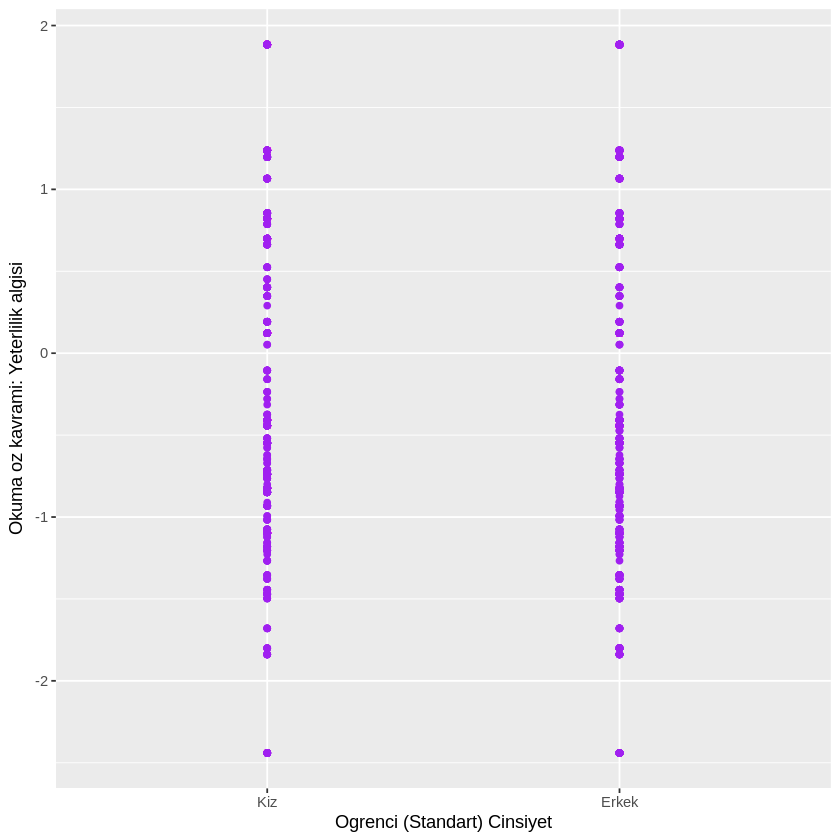

In [93]:
ggplot(miniPISA, aes(CINSIYET, OK_YETERLIK)) +
  geom_point(color = "purple") # saçılım grafiğinin rengini seçme

Çıktıda görüldüğü üzere, x ekseninde cinsiyet kategorik değişkeni y ekseninde ise okuma yeterlik puanları olmak üzere bu iki değişken arasındaki ilişki geom_point() argümanı ile saçılım grafiği ile verilmiştir. Bu argümanın içine color = “purple” yazılarak grafik mor renge dönüştürülmüştür.

# **size ve shape parametreleri**

Size parametresi ile büyüklük shape parametresi ile şekil düzenlemesi yapılabilmektedir. Default değerleri sırasıyla 1 ve noktadır. Bir örnek veri seti üzerinden bu parametrelerin kullanımlarını inceleyelim.

Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_point()`).”


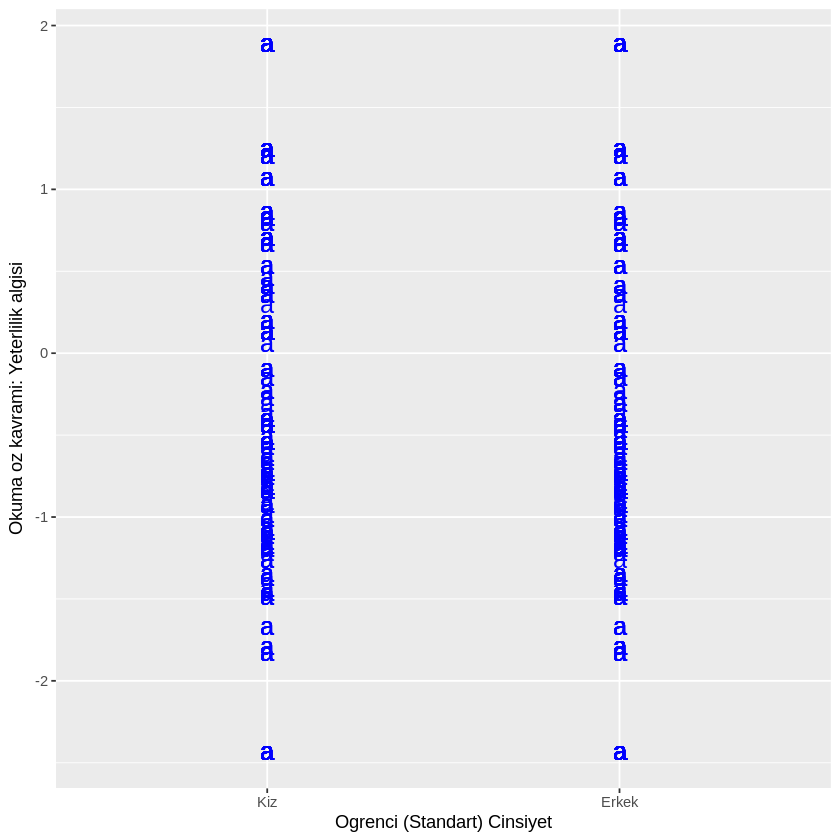

In [94]:
ggplot(miniPISA, aes(CINSIYET, OK_YETERLIK)) +
  geom_point(color = "blue",size=5, shape="a") # saçılım grafiğinin rengini,

Görüldüğü üzere saçılım grafiğindeki şekillerin rengi, büyüklüğü ve şekli geom_point() fonksiyonu içinde özelleştirilmiştir. Mavi renkli büyüklüğü “5” olan ve “a” şeklinde cinsiyet ve okuma yeterliği arasındaki ilişkiyi inceleyen saçılım grafiği oluşturulmuştur. Bu argümanlar yine color argümanında olduğu gibi aes() içinde yazılarak gruplandırma yapılabilir. Gruplandırma ile her bir kategorinin farklı renklendirilmesi sağlanır. Aşağıdaki örnek cinsiyete göre gruplandırma yapıldığını göstermektedir.

Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_point()`).”


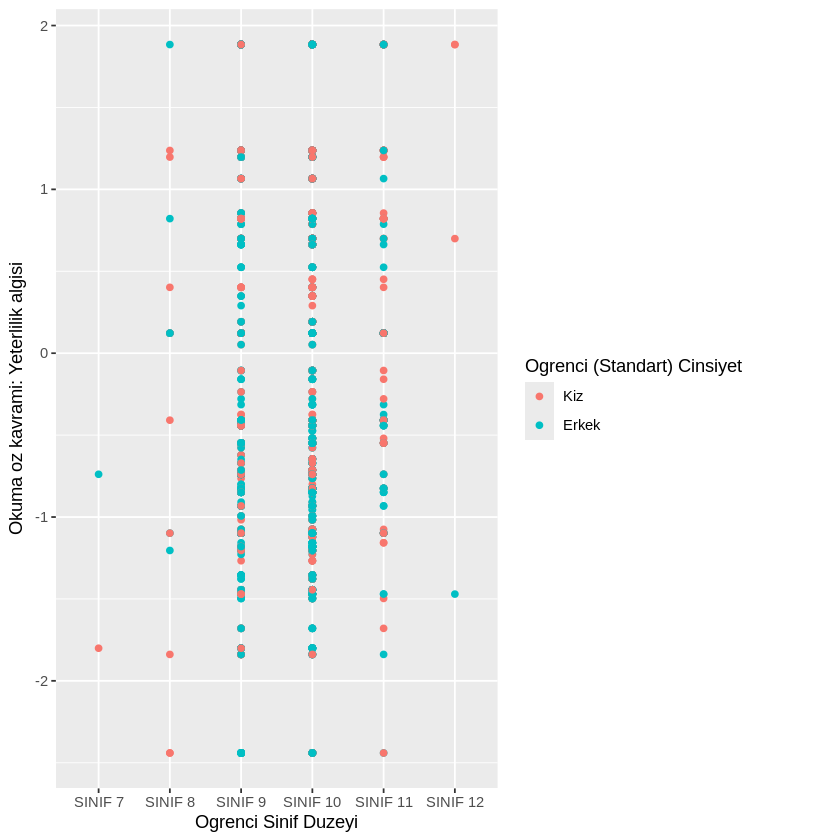

In [95]:
ggplot(miniPISA, aes(SINIF, OK_YETERLIK, color = CINSIYET)) + # cinsiyete göre gruplandırma
  geom_point() # saçılılm grafiği çizme

Elde edilen çıktıda sınıf değişkeni renk olarak gruplandırıldığından kız ve erkek öğrencilerin sınıf düzeyleri ile okuma yeterlikleri arasındaki ilişki farklı renkler ile gösterilmektedir. Eğer burada üst üste gelen noktalar ayrıştırmak isteniyorsa aşağıdaki örnekte olduğu gibi geom_point() fonksiyonu içine position=“jitter” denklemi yazılabilir.

Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_point()`).”


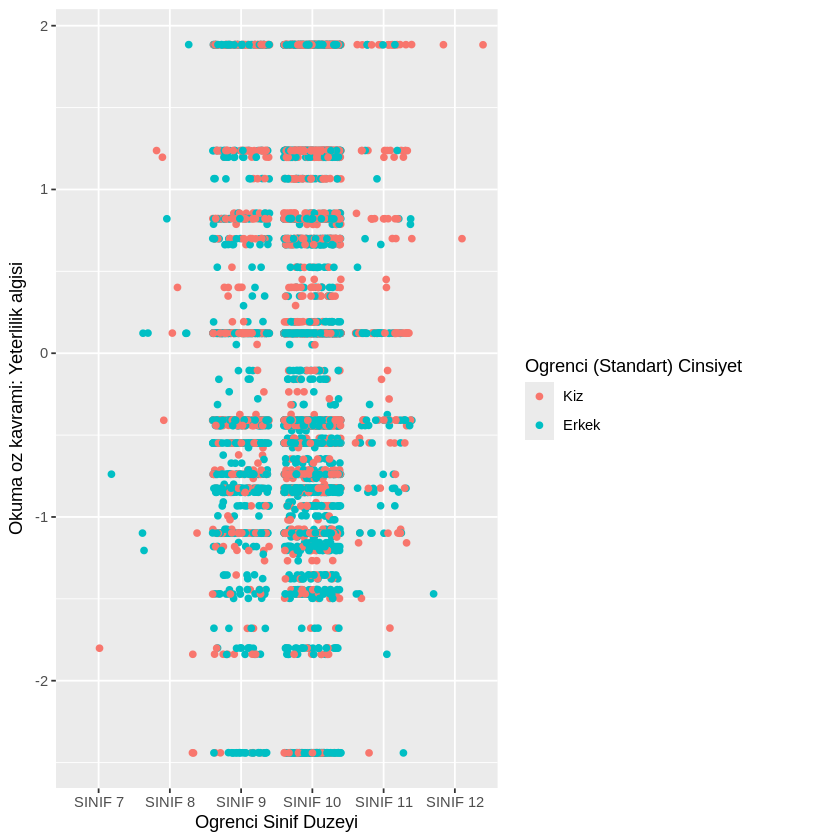

In [96]:
ggplot(miniPISA, aes(SINIF, OK_YETERLIK, color = CINSIYET)) + # cinsiyete göre renk
  # açısından gruplandırma
  geom_point(position = "jitter") # üst üste gelen noktaları kaydırma

Okuma yeterlik puanları ile sınıf düzeyleri arasındaki ilişki cinsiyete göre gruplandırılarak saçılım grafiği çizilmiştir. Fazla gözlem içerdiğinden üst üste gelen noktalar kaydırılmıştır.

# **size parametresi**

Bahsedildiği gibi size parametresi ile grafikteki şekillerin büyüklüğü ayarlanabilirken, color parametresinde olduğu gibi de şekillerin büyüklüğüne göre gruplama yapılabilir. aes() içinde size parametresi verilerek gruplama yapılmıştır.

Warning message:
“Using size for a discrete variable is not advised.”
Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_point()`).”


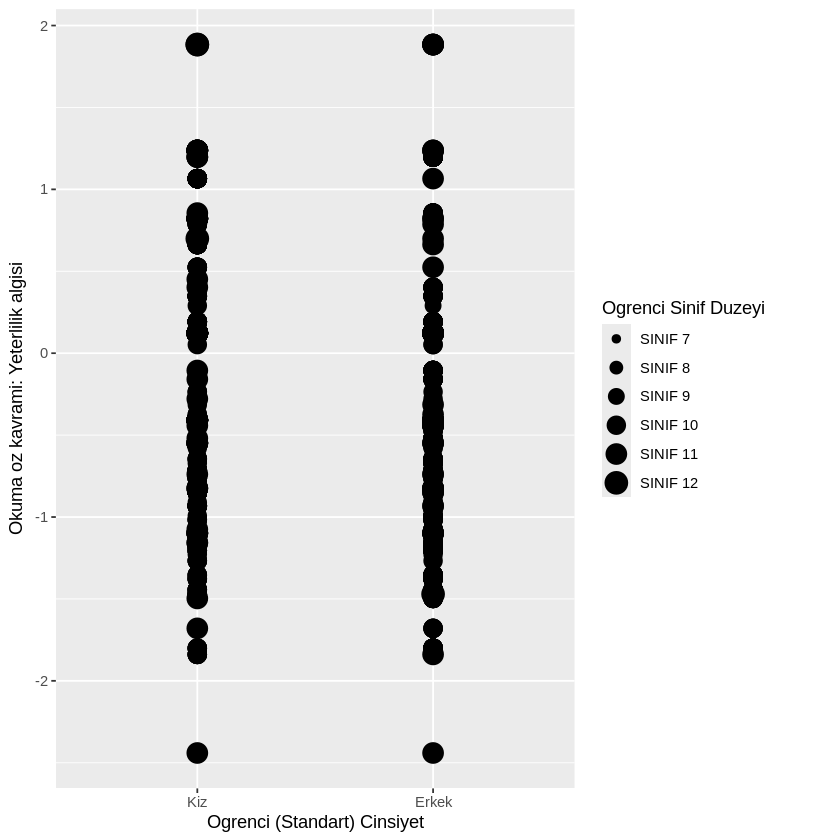

In [97]:
ggplot(miniPISA, aes(CINSIYET, OK_YETERLIK, size = SINIF)) + #sınıf değişkenine göre büyüklük
  # açısından gruplandırma
  geom_point() #saçılım grafiği çizme

Elde edilen çıktıda sınıf değişkeni size olarak gruplandırıldığından farklı sınıf düzeylerindeki öğrencilerin cinsiyetleri ile okuma yeterlikleri arasındaki ilişki farklı büyüklükteki noktalar ile gösterilmektedir. Ayrıca bu örnekteki gibi bazı veri setleri oldukça fazla gözlemler içerdiğinden çoğu gözlem grafikte üst üste gelmekte ve bunun sonucunda bu gözlemlerin görüntülenmesi zorlaşmaktadır. Bu durumda üst üste binen noktaları kaydırarak ayırmak için position parametresi kullanılmaktadır.

Bu parametrenin alabildiği bazı değerler aşağıda açıklanmıştır.

“identity”: Bu varsayılan konum/position ayarlamasıdır. Verileri değiştirmez ve noktalar doğrudan belirtilen x ve y koordinatlarında çizilir. Bu genellikle dağılım grafikleri için kullanılır. Üst üste binen gözlemler nedeniyle sütun grafiklerinde kullanışlı değildir.

“jitter”: Bahsettiğiniz gibi, bu, noktaları yaymak ve aşırı çizimi azaltmak için noktalara az miktarda rastgele gürültü ekler. Özellikle saçılım grafiklerinde oldukça kullanışlıdır.

jitter argümanının direkt kullanımı:

Warning message:
“Using size for a discrete variable is not advised.”
Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_point()`).”


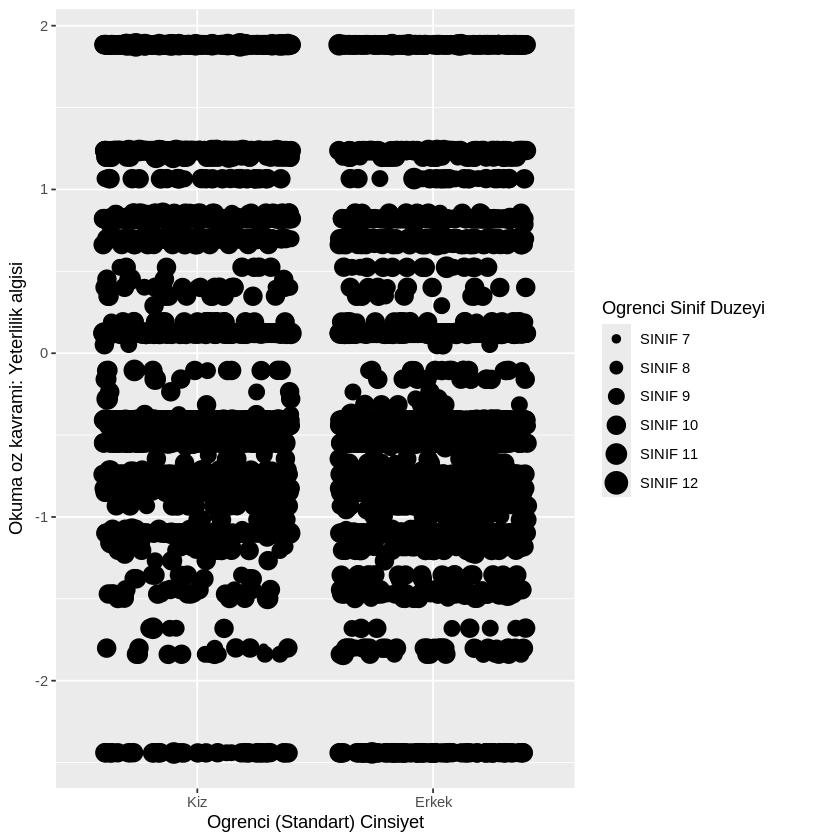

In [98]:
# sınıf değişkenine göre büyüklük açısından gruplandırma
ggplot(miniPISA, aes(CINSIYET, OK_YETERLIK, size = SINIF)) +
  geom_point(position = "jitter") # üst üste gelen noktaları kaydırma

jitter argümanının manipüle edilmesine imkân tanıyan fonksiyon şeklinde kullanımı:

Warning message:
“Using size for a discrete variable is not advised.”
Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_point()`).”


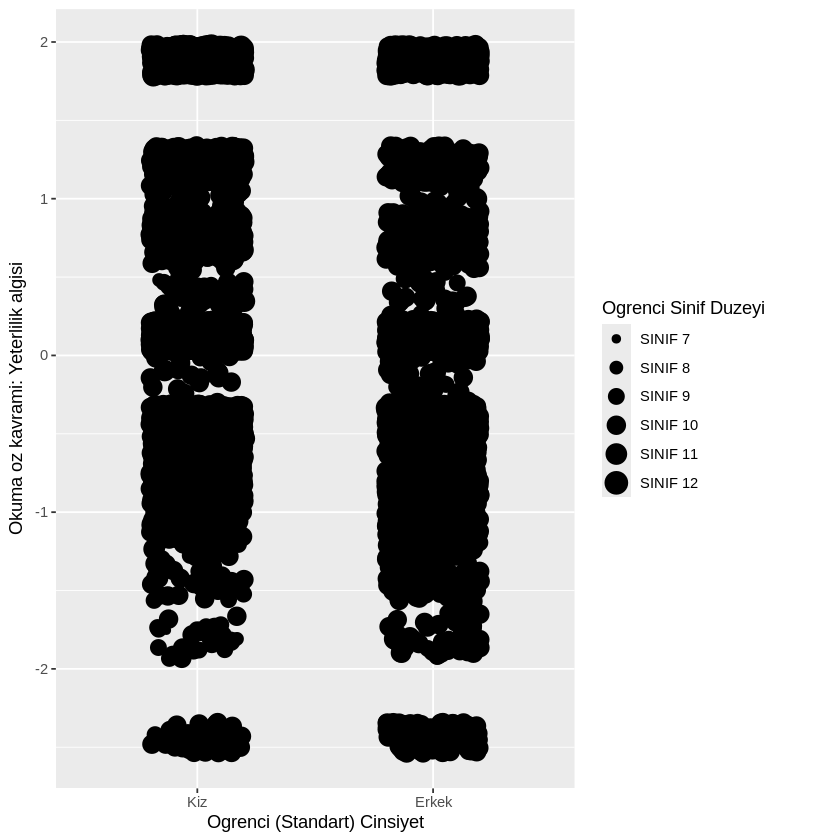

In [99]:
ggplot(miniPISA, aes(CINSIYET, OK_YETERLIK, size = SINIF)) +
  geom_point(position = position_jitter(width = 0.2, height = 0.1))

“dodge”: Genellikle çubuk grafiklerle kullanılır. Üst üste binen nesneleri yan yana konumlandırır. Örneğin, kategorik x eksenli bir çubuk grafiğinde gruplar karşılaştırılmak istendiğinde dodge kullanılması faydalıdır.

“stack”: Noktaları üst üste yığar. Bu, yoğunluk grafikleri veya alan grafikleri ile uğraşırken kullanışlıdır.

“fill”: Bu, “stack”a benzer ancak noktalar arasındaki boşluğu doldurur. Genellikle çizgi grafikleri ile kullanılır.

Her bir pozisyon parametresi “jitter” örneğinde olduğu gibi fonksiyon şeklinde yazılabilir ve uzunluk, genişlik parametreleri ayarlanabilir. Ayrıca konum parametresinin seçimi, grafiğinizin özel gereksinimlerine ve çalıştığınız veri türüne bağlıdır. İstediğiniz görsel temsili elde etmek için farklı değerlerle denemeler yapabilirsiniz.

# **Katmanlar**

ggplot2 paketi içinde farklı görsel materyaller grafik katmanları oluşturacak şekilde eklenebileceğinden bahsetmiştik. Her komut bir öncekine artı sembolü (+) ile eklenerek çok katmanlı bir çizim nesnesi oluşturulur. Karmaşık görünen bu sistem aslında oldukça kullanışlıdır. Temel olarak ggplot() fonksiyonu ile başlanır ve geom katmanları ile histogram, saçılım, frekans gibi grafik türleri eklenir. Daha sonra ise eksen etiketleri, başlık, yazı tipleri, boyutlar, renk şemaları, şekiller gibi tasarımla ilgili parametreler çizime eklenir.

# **alpha**

Şeffaflık düzeyini ayarlamak için alpha kullanılır. Bu değer sıfıra yaklaştıkça saydamlık artar.

Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_point()`).”


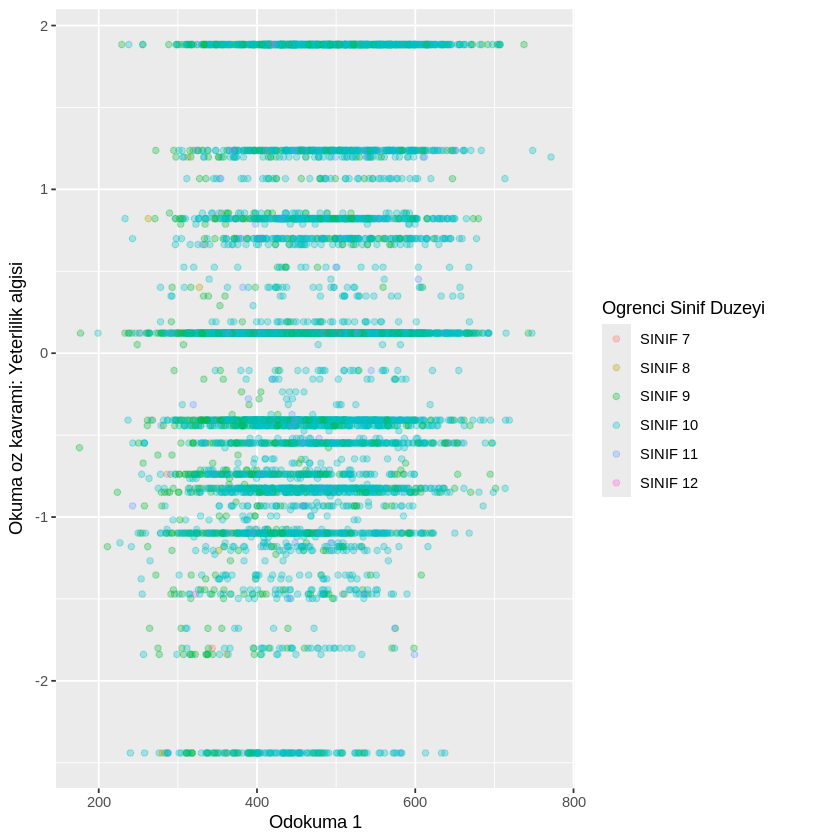

In [100]:
ggplot(miniPISA, aes(ODOKUMA1, OK_YETERLIK, color = SINIF)) +
  geom_point(alpha = 0.3)

Elde edilen çıktıda ODOKUMA1 ile OK_YETERLIK değişkenleri arasındaki ilişkinin sınıf düzeyine göre saçılım grafiği görülmektedir. geom_point() fonksiyonu içindeki alpha argümanı ile noktaların şeffaflığı sağlanmıştır.

Katmanlar, “+” ile grafik1 adlı nesneye eklenebilir.

Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_point()`).”


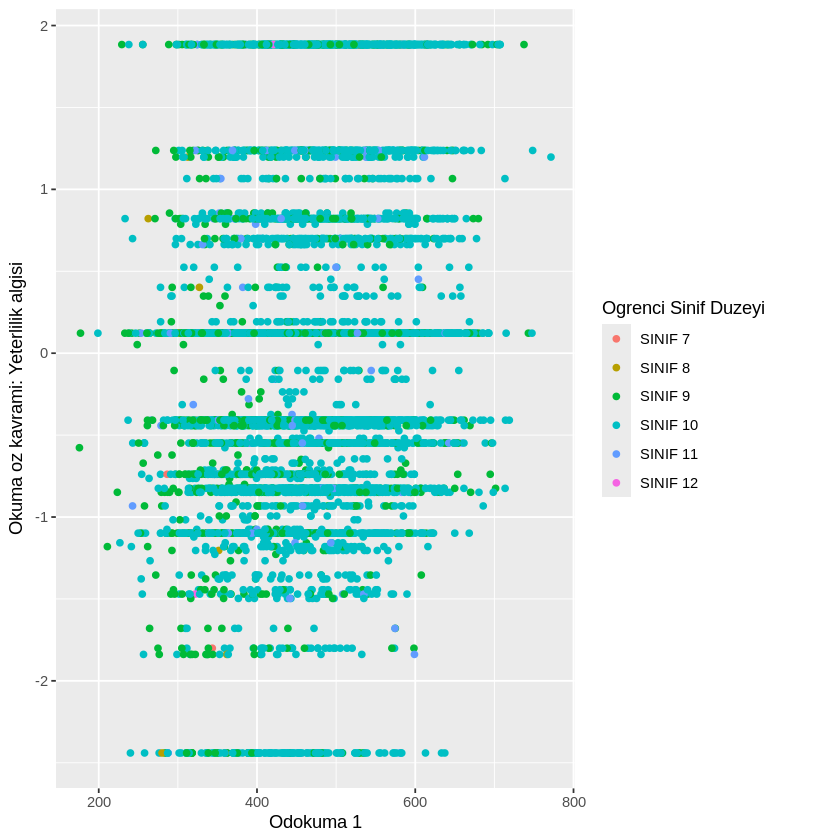

In [101]:
grafik1 <- ggplot(miniPISA, aes(ODOKUMA1, OK_YETERLIK, color = SINIF))
grafik1 +geom_point(alpha = 1.2)

grafik1 adlı nesneye CINSIYET değişkenine göre şekil eklenebilir. Burada cinsiyet değişkeninin düzeyleri farklı şekillerde gruplanır. Bir noktayı (varsayılan şekil) yıldız, üçgen, kare ya da harfler olarak görselleştirebiliriz.

Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_point()`).”


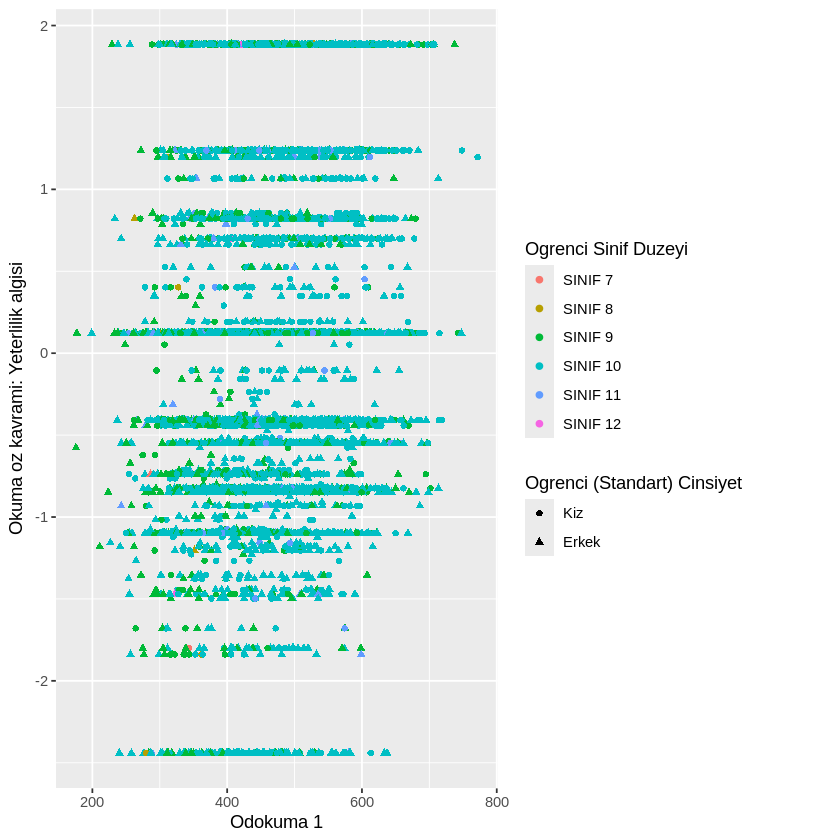

In [102]:
grafik1+geom_point(aes(shape=CINSIYET))

# **text**
geom_text() fonksiyonu ile metinler veri sembolü olarak eklenebilir. Gösterim amacıyla veri setinin sadece ilk 10 satırı kullanılmıştır.


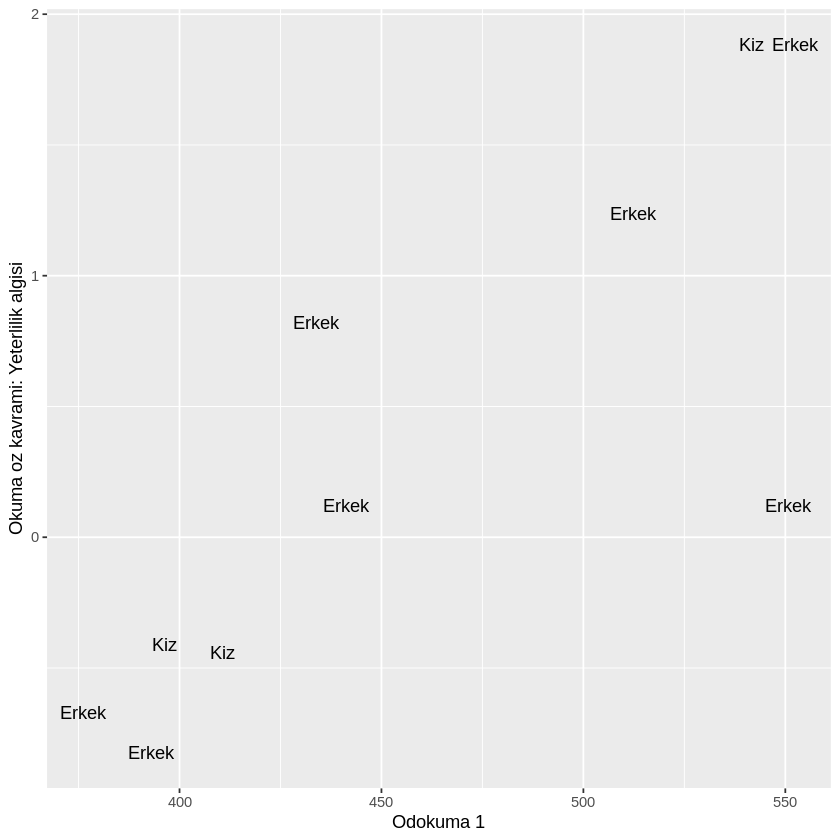

In [103]:
ggplot(miniPISA[1:10,], aes(ODOKUMA1, OK_YETERLIK))+
         geom_text(aes(label = CINSIYET))

Çıktıda görüldüğü üzere değişkenler arası ilişkiler nokta ya da şekil yerine yazı ile ifade edilmiştir. Burada dikkat edilmesi gereken, geom_text() fonksiyonunun içine yazılacak label argümanı ile etiketlemenin hangi gruplama değişkeni ile yapılması gerektiğidir.

# **Scale**

ggplot2 paketinde, scale_*() fonksiyonları çeşitli çizim estetiğinin ölçeklerini özelleştirmek için kullanılır. Bu fonksiyonlar, ggplot’unuzdaki eksenlerin, etiketlerin ve diğer görsel öğelerin görünümünü ve davranışını kontrol etmenizi sağlar.

Yaygın olarak kullanılan bazı scale_*() fonksiyonları amaçlarıyla birlikte verilmiştir. Bu fonksiyonlar, grafiklerinizin görünümünde ince ayar yapmak ve iletmek istediğiniz bilgileri etkili bir şekilde iletmelerini sağlamak için esnek bir yol sağlar.

scale_x_continuous() ve scale_y_continuous(): Bu fonksiyonlar, sürekli değişkenler için x ve y eksenlerinin ölçeklerini özelleştirmek için kullanılır. Sınırları, kesmeleri, etiketleri ve diğer özellikleri belirtebilirsiniz. Örneğin scale_x_continuous(limits = c(0, 10), breaks = seq(0, 10, by = 2)) kodu ile x ekseni limitlerini ve kesim noktalarını belirler.

scale_x_discrete() ve scale_y_discrete(): Bu fonksiyonlar x ve y eksenlerindeki kategorik(factor) değişkenler için kullanılır. Eksen etiketlerinin ve adlarının görünümünü özelleştirmenize olanak tanırlar. Örneğin scale_x_discrete(labels = c("A", "B", "C")) kodu ile kategorik(faktor) değişkenin düzeyi değiştirilebilir.

scale_color_*() ve scale_fill_*(): Bu fonksiyonlar, renk ve dolgu gibi farklı estetikler için renk ölçeklerini özelleştirmek için kullanılır. Renk paletlerini, etiketler ve diğer özellikleri değiştirebilirsiniz. Örneğin scale_color_manual(values = c("red", "blue", "green")) üç düzeyli bir kategorik değişkeninin renklerini ayarlar.

scale_size() ve scale_size_continuous(): Bu fonksiyonlar bir çizimdeki öğelerin boyutunu özelleştirmek için kullanılır.

scale_shape(): Bu fonksiyon, bir dağılım grafiğindeki noktaların şeklini özelleştirmek için kullanılır. Şekiller ile aşağıda yer alan 24 değer kullanılabilir.

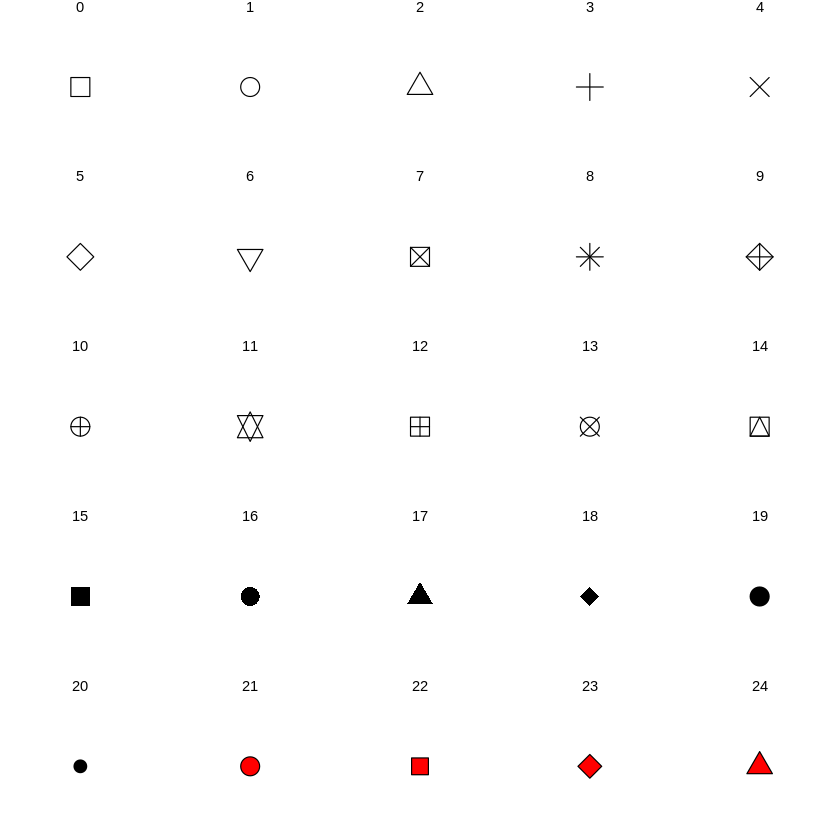

In [104]:
 sekiller <- data.frame(sekil = 0:24)
ggplot(sekiller, aes(0, 0, shape = sekil)) +
  geom_point(aes(shape = sekil), size = 5, fill = 'red') +
  scale_shape_identity() +
  facet_wrap(~sekil) +
  theme_void()

Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_point()`).”


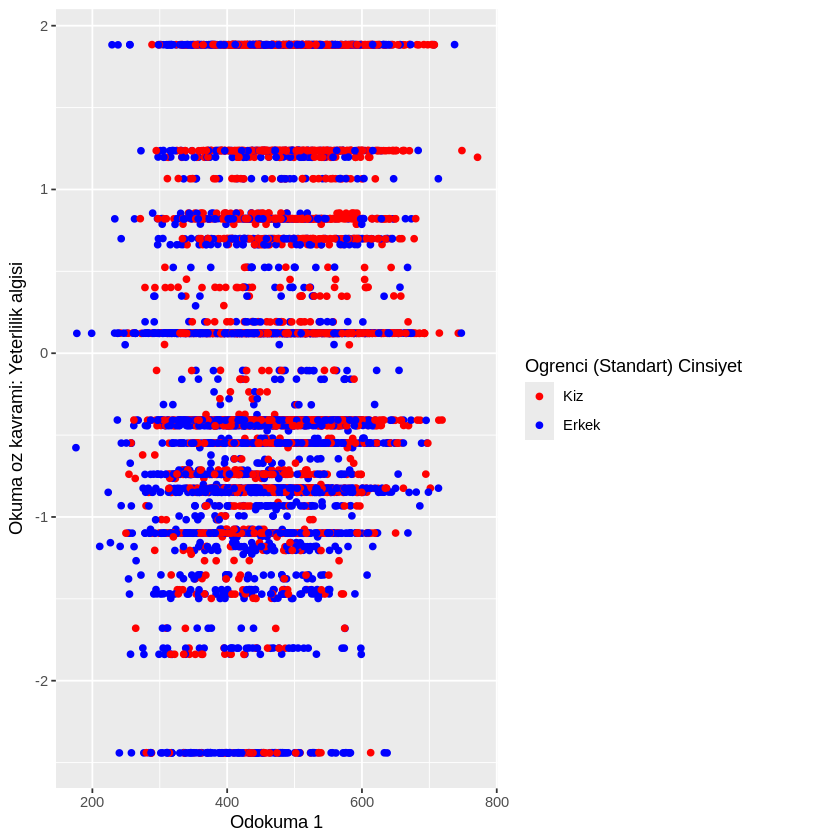

In [105]:
ggplot(miniPISA, aes(x = ODOKUMA1,y = OK_YETERLIK, color = CINSIYET)) +
geom_point(position = "jitter") +
scale_color_manual(values = c("red", "blue"))

# **Limits**

limits argümanı ile sınırlar belirlenir. Örneğin x ekseninin minimum ve maksimum değerleri belirlenmek isteniyorsa aşağıdaki örnekteki gibi bu argüman kullanılır.

Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_point()`).”


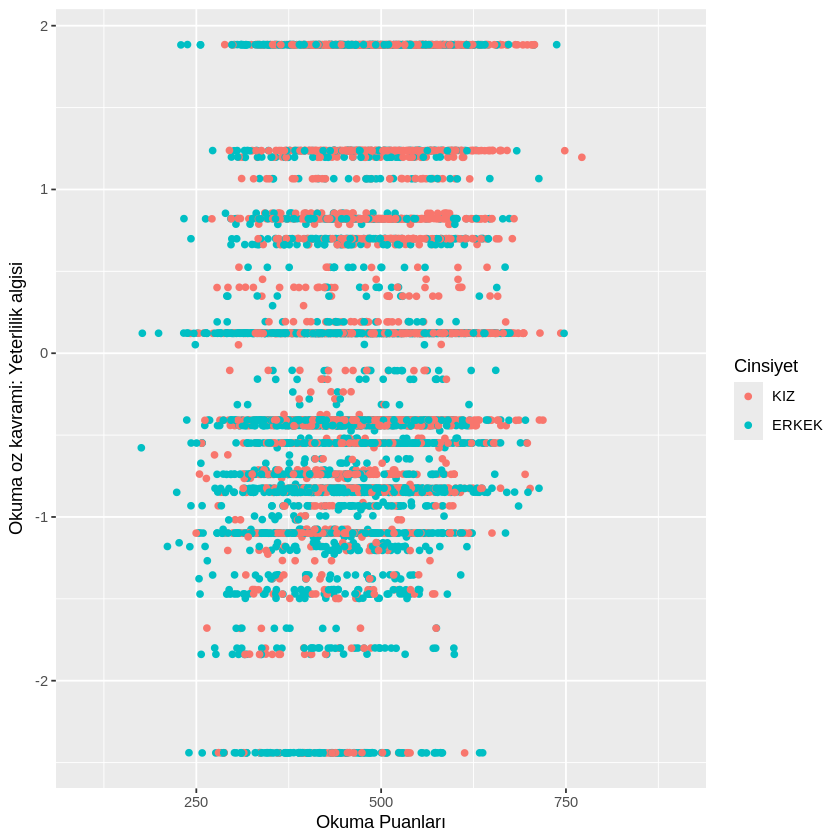

In [106]:
ggplot(miniPISA, aes(x = ODOKUMA1,y = OK_YETERLIK,color = CINSIYET)) + # cinsiyete göre gruplandırma
geom_point(position = "jitter") +  # üst üste gelen noktaları kaydırma
scale_x_continuous("Okuma Puanları",limits = c(100,900)) + # x eksenindeki okuma puanlarını sınırlandırma
scale_color_discrete("Cinsiyet",labels=c("KIZ","ERKEK"))  # cinsiyete göre

**Breaks**

breaks=seq() fonksiyonu ile eksenin sınırları ve ayrımı belirlenir. seq() içine sırasıyla eksenin başlayacağı sayı, biteceği sayı ve kaçar kaçar ilerleneceği yazılır.

Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_point()`).”


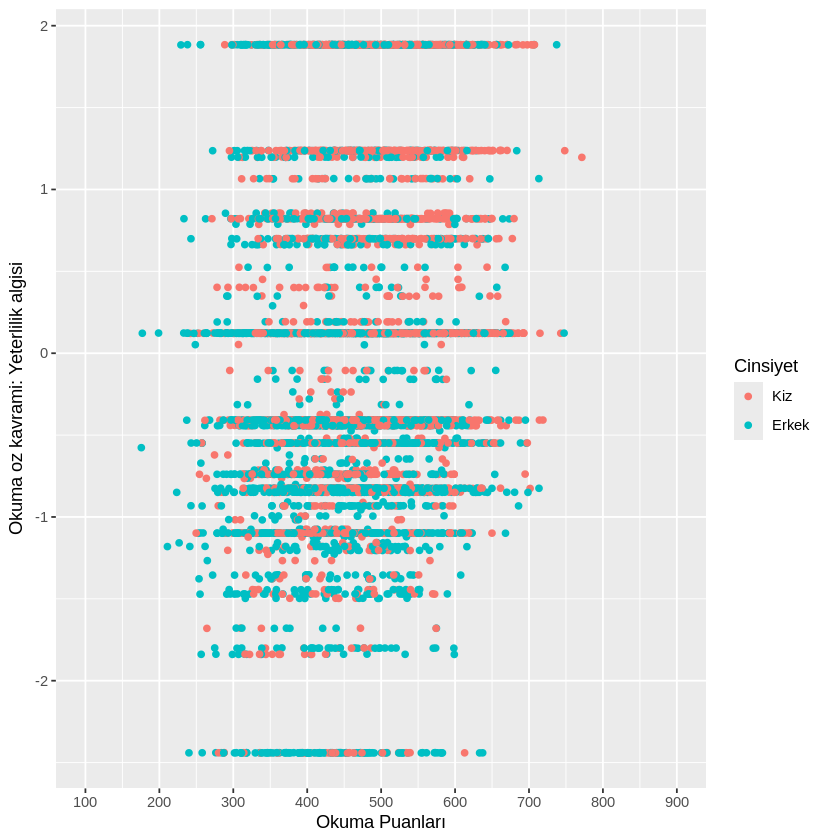

In [107]:
ggplot(miniPISA, aes(x = ODOKUMA1,
y = OK_YETERLIK,
color = CINSIYET)) +
geom_point(position = "jitter") +
scale_x_continuous("Okuma Puanları",limits = c(100,900),
         breaks=seq(100,900,100)) +
  scale_color_discrete("Cinsiyet")

Çıktıda görüldüğü üzere x ekseninde okuma puanları, y ekseninde okuma yeterlik puanları yer alacak seçilde saçılım grafiği çizilmiştir. x ekseni 100 ile 900 arasında sınırlandırılmış ve 100’er 100’er ayrılmıştır. Cinsiyet değişkenine göre gruplandırma yapıldığından kız ve erkek öğrencilere ait saçılım grafiği verilmiştir.

# **expand**

expand argümanı ile genişletme yani birleştirme yapılır. Aşağıdaği örnekte expand=c(0,0) ile x eksen limitleri değiştirilmiştir.

Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_point()`).”


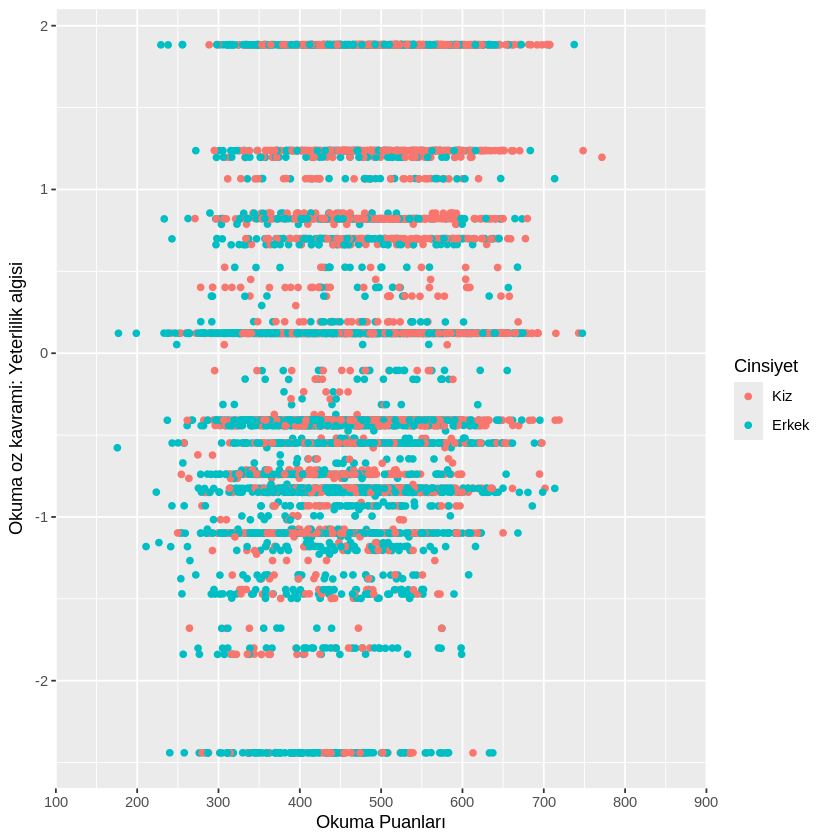

In [108]:
ggplot(miniPISA, aes(x = ODOKUMA1,
y = OK_YETERLIK,
color = CINSIYET)) +
geom_point(position = "jitter") +
scale_x_continuous("Okuma Puanları",limits = c(100,900),
                   breaks=seq(100,900,100), expand=c(0,0)) +
scale_color_discrete("Cinsiyet")

# **labs**
labs argümanı ile etiketleme eklenir. Grafik eksenleri (x ve y), başlık(title), alt başlık(subtitle) ve grup (color) isimlendirmeleri yapılır.

Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_point()`).”


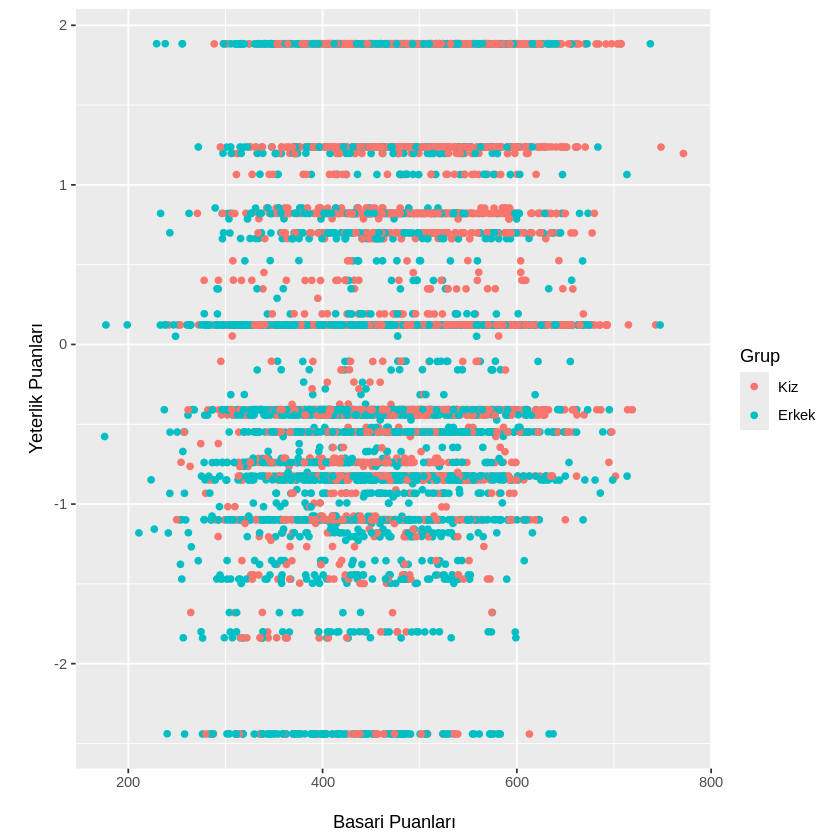

In [109]:
ggplot(miniPISA, aes(x = ODOKUMA1,
y = OK_YETERLIK,
color = CINSIYET)) +
geom_point(position = "jitter") +
  labs(x = "\nBasari Puanları",
       y = "\nYeterlik Puanları",
       color = "Grup")

# **Bar Grafiği**
En sık kullanılan grafiklerden olan bar grafikleri ya da sütun grafikleri frekansların dağılımını vermektedir. En çok kullanılan dikeyde frekansların yatay eksende ise değişken ve değişken kategorilerinin yer aldığı dikey versiyondur. Ayırıcı özelliği ise sütunlar arasında boşluk olmasıdır. Bu durum sıralama ve sınıflama ölçeğindeki verilerin görselleştirilmesinde kullanılan grafik türü olmasından kaynaklanmaktadır.

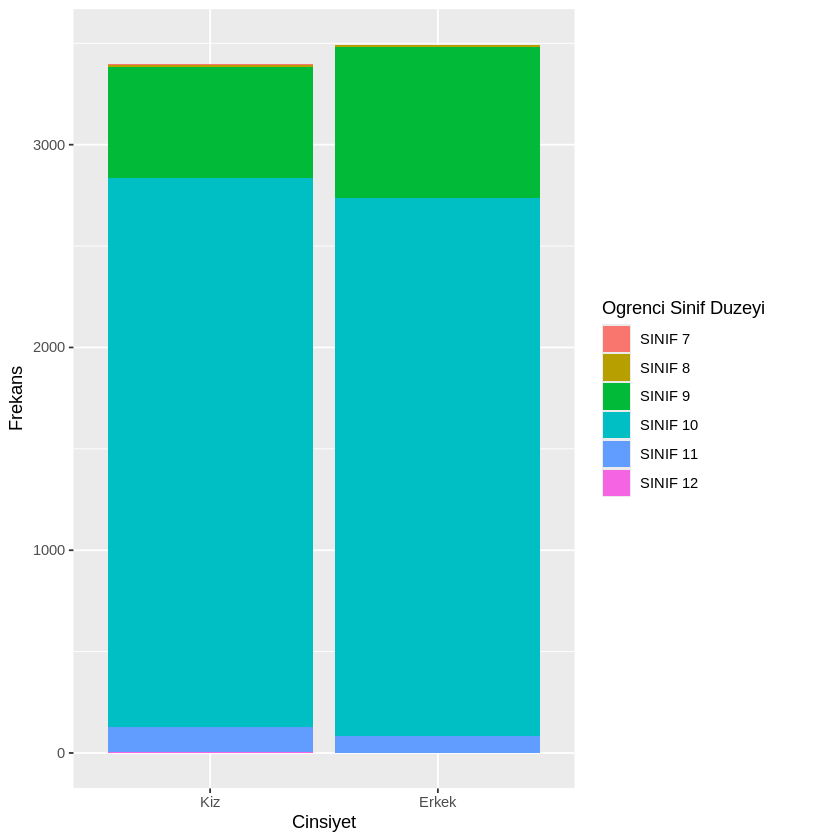

In [110]:
ggplot(miniPISA, aes(CINSIYET, fill = SINIF)) + geom_bar() + # bar grafiği
  labs(x = "Cinsiyet",
       y = "Frekans") #etiketleme yapılması

Grafik ile veri eşlemesi aynı zamanda mapping= argümanı ile de yapılabilir.

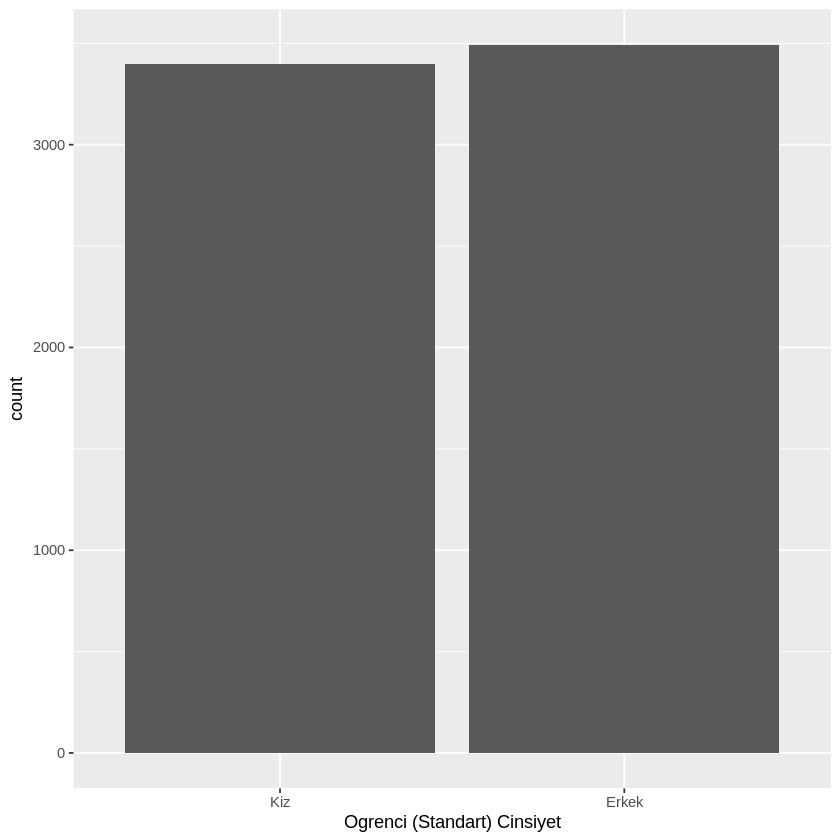

In [111]:
ggplot(data = miniPISA, mapping = aes(x = CINSIYET)) +
  geom_bar()

Elde edilen çıktıda x ekseninde cinsiyet y ekseninde ise frekansların yer aldığı görülmektedir. Şimdi y ekseninde frekans değerleri yerine yüzde değerlerini alalım.

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


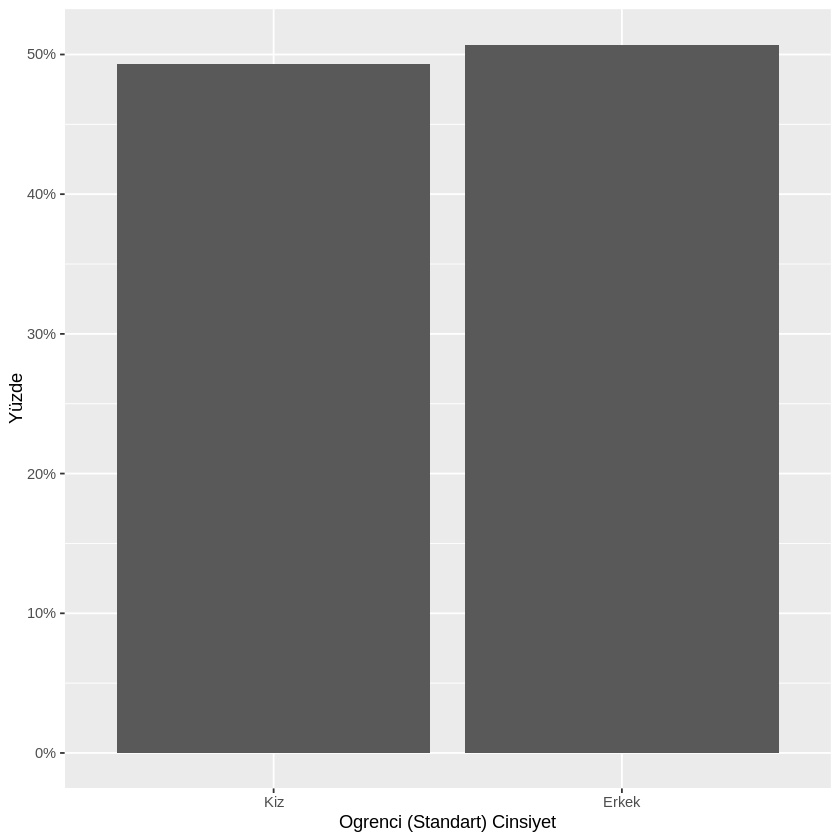

In [112]:
ggplot(data = miniPISA, mapping = aes(x = CINSIYET)) +
  geom_bar(aes(y = (..count..)/sum(..count..)))+
  scale_y_continuous(name = "Yüzde", labels=scales::percent)

Burada bar grafiği yardımıyla sütundaki frekans değerleri yüzdeye çevrilerek verilmiştir. Elde edilen sonuca göre kız ve erkek oranları birbirine oldukça yakındır.

# **scale_fill**
fill argümanı ile belli bir değişkenin düzeylerine göre gruplama yapılan veri seti, scale_fill argümanıyla da her bir gruba ait farklı şekil içi renklendirme yapılır. Hatta bu şekil içi dolgular scale_fill_manual argümanı ile özelleştirilebilir.

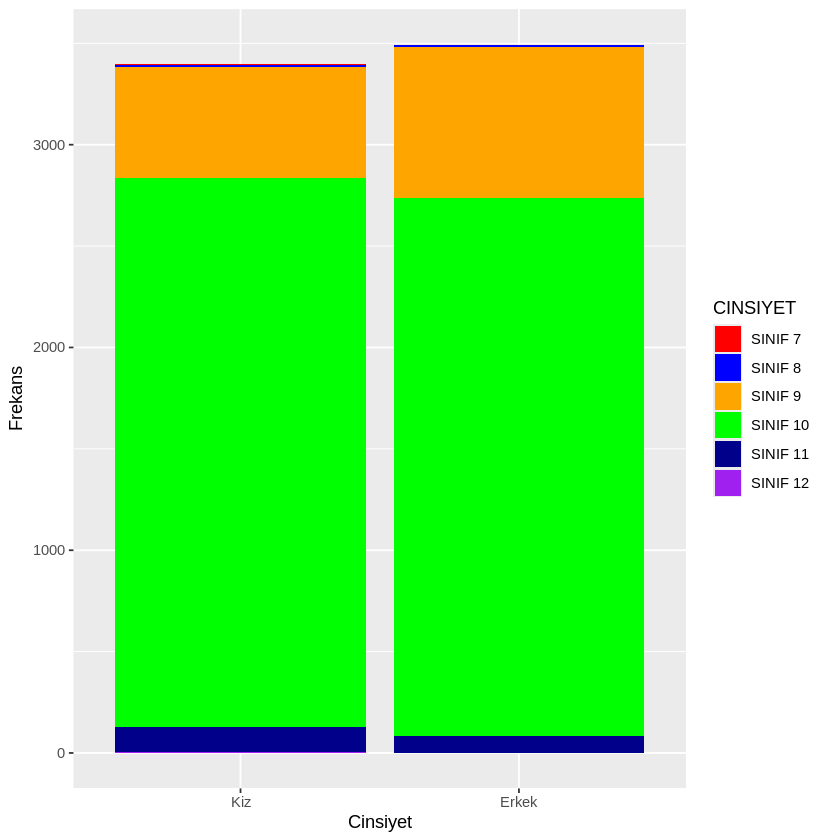

In [113]:
ggplot(miniPISA, aes(CINSIYET, fill = SINIF)) +
  geom_bar() +
   labs(x = "Cinsiyet",
       y = "Frekans") +
  scale_fill_manual("CINSIYET", values = c("red","blue","orange","green",
                                           "darkblue","purple"))

# **Çizgi Grafiği**

Veri setindeki gözlemlerin çizgilerle birleştirildiği çizgi grafikleri, x ekseninde genellikle zamanın yer aldığı verilerin zamana göre değişimi hakkında bilgi verir. Yıllara göre değişimi gösteren bir grafik elde etmek için 2009, 2012 , 2015 , 2018 veri setleri içlerinden okuma olası puanları (PV1READ) ve okuma olası puanları (ESCS) seçilerek R ortamına aktarılmıştır.

In [ ]:
library(tuev)
PISA2009 <-PISA_STU_2009 %>%
  select(PV1READ,ESCS) %>%
  mutate(YIL=2009)

PISA2012 <-PISA_STU_2012 %>%
  select(PV1READ,ESCS) %>%
  mutate(YIL=2012)

PISA2015 <-PISA_STU_2015 %>%
  select(PV1READ,ESCS) %>%
  mutate(YIL=2015)

PISA2018 <-PISA_STU_2018 %>%
  select(PV1READ,ESCS) %>%
  mutate(YIL=2018)

Dört veri seti rbind fonskiyonu ile birleştirilmiştir.

In [115]:
dat <-rbind(PISA2009, PISA2012, PISA2015, PISA2018)

Yıllara göre ortalama başarı puanlarını göstermek için öncelikle group_by() ve summarise() fonksiyonları ile ortalama alınmış, daha sonra geom_line() fonksiyonu içinde çizgi türü ve renk değiştirilerek grafik elde edilmiştir.

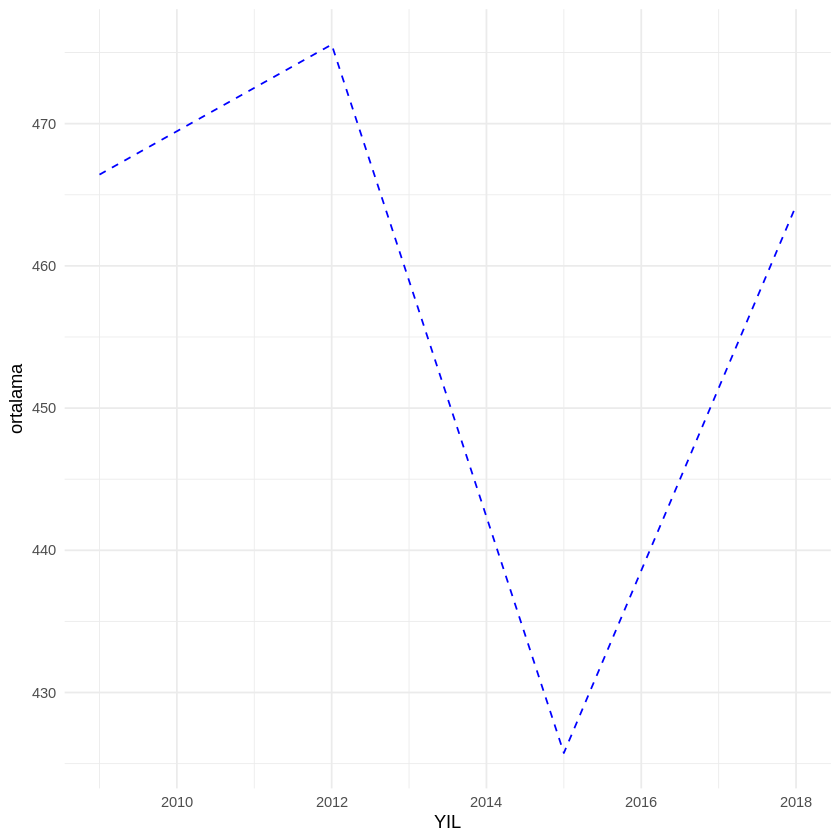

In [116]:
dat1 <- dat %>%
  group_by(YIL )  %>%
 summarise( ortalama = mean(PV1READ,na.rm=TRUE))  %>%
  ungroup()

ggplot(dat1 , aes(x=YIL,y= ortalama)) +
  geom_line(linetype = 2 , color = "blue") +
  theme_minimal()

Yukarıda yer alan çizgi grafiğinde theme_minimal() fonksiyonu ile arka plan sadeleştirilmiştir. theme_*() fonksiyonları ile farklı arka planlar deneyebilirsiniz.

Çizgi grafikleri özellikle regresyon eğrileri oluşturmak için kullanır. Sosyoekonomik düzey başarı arasındaki ilişkiyi görselleştirmek için ilk olarak ESCS değişkeni kategorik hale getirilmiştir. Daha sonra ESCS’in kategorik düzeyleri için ESCS ve PV1 read değişkenlerinin ortalaması alınmıştır. Oluşan veri setinin ilk satırları yazdırılmıştır.

In [117]:
dat2 <- dat %>% mutate(ESCS_kategorik =
                            case_when(
                              ESCS > -4 & ESCS <=  -2 ~ "Dusuk",
                              ESCS > -2 & ESCS <=  0 ~ "Orta",
                              ESCS > 0    ~ "Yuksek"))

dat3 <- dat2 %>% group_by(YIL, ESCS_kategorik)   %>%
  summarise(ortalamaSES= mean(ESCS,na.rm=TRUE),
            ortalamaPV1= mean(PV1READ,na.rm=TRUE))   %>%
  arrange(desc(ortalamaSES)) %>% ungroup()
head(dat3)

`summarise()` has grouped output by 'YIL'. You can override using the `.groups`
argument.


YIL,ESCS_kategorik,ortalamaSES,ortalamaPV1
<dbl>,<chr>,<dbl>,<dbl>
2009,Yuksek,0.6971875,520.5263
2018,Yuksek,0.6203155,520.3108
2012,Yuksek,0.5601363,546.8456
2015,Yuksek,0.5425814,474.2258
2009,Orta,-1.0970425,467.8152
2015,Orta,-1.1022885,427.7917


Regresyon doğrusunun oluşturulması için ggpubr (Kassambara, 2023) paketinin stat_regline_equation() fonksiyonundan yararlanılmıştır.

In [ ]:
install.packages("ggpubr")
library(ggpubr)
ggplot(dat3, aes(x=ortalamaSES , y=ortalamaPV1)) +
  geom_line() +
  facet_wrap(vars(YIL)) +
  geom_smooth(method='lm', formula= y~x)+
  stat_regline_equation() +
    xlab("Ortalama ESCS") + ylab("Ortalama PV1") +
theme_bw()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘Deriv’, ‘forecast’, ‘microbenchmark’, ‘rbibutils’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘Rdpack’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




# **Kutu grafiği**
geom_boxplot() fonksiyonu ile kutu grafiği çizilir. Kutu grafiği ile veri setinin minimum, ilk çeyrek, medyan, üçüncü çeyrek ve maksimum değerleri gösterilir.

In [ ]:
ggplot(miniPISA, aes(x = CINSIYET,y = OK_YETERLIK)) +
  geom_boxplot(color="red", fill="purple", alpha=0.2)

coord_flip() fonksiyonu, x ve y eksenlerinin yerlerini değiştirmek amacıyla kullanılır. Bazen bu şekilde bir kullanım daha faydalı olabilmektedir.

In [ ]:
ggplot(miniPISA, aes(x = CINSIYET,y = OK_YETERLIK)) +
  geom_boxplot(color="red", fill="purple", alpha=0.2) +
coord_flip()

Bu bölümde veri görselleştirmede en sık kullanılan ggplot paketi, bu pakette yer alan temel fonksiyonların kullanımı ve grafik türleri örneklerle anlatılmıştır. Bir sonraki bölümde veri görselleştirmede kullanılan ileri düzey grafiklere örnekler verilmiştir.

# **İleri Düzey Grafik Örnekleri**

Bu bölümde veri görselleştirme ile ilgili daha ileri düzey grafiklere ait birkaç örneğe yer verilerek okuyucularla etkileşim oluşturmak amaçlanmıştır. Burada yer alan grafikler, plotly (Sievert, 2020) kütüphanesi kullanılarak oluşturulmuştur. “plotly” paketi ise R yazılımında hem basit grafiklerin hem de 3 boyutlu grafiklerin çiziminde oldukça modern görseller sağlamaktadır. Ek olarak “plotly” paketi R Shiny uygulamalarında sıklıkla kullanılan bir pakettir. Basit ve istatistiksel grafiklerin yanında, bilimsel ve finans grafiklerinin çizimine de olanak sağlamaktadır. Ayrıca harita grafikleri, 3 boyutlu grafikler, çoklu eksenlere dayalı garfikler ile animasyonlar ile oldukça geniş bir veri görselleştirme olanağı sunmaktadır. Eğer elde edilen grafikler çevrim içi ortamlarda yayınlanacak ise plotly bu bakımdan kullanım kolaylığı sağlamaktadır. plot_ly() ana fonksiyonunun yanında birden çok argüman ile birlikte çalıştırılmaktadır. “ggplot2” paketine benzer bir şekilde grafikleri nesnelere kaydederek çizmektedir.

# **Anne Eğitim Düzeyi**

In [ ]:
library(plotly)
data <- miniPISA %>% group_split(Anne_Egitim)
#data[1][[1]]
OD_1 <- density(data[1][[1]]$ODOKUMA1, na.rm = TRUE)
OD_2 <- density(data[2][[1]]$ODOKUMA1, na.rm = TRUE)
OD_3 <- density(data[3][[1]]$ODOKUMA1, na.rm = TRUE)
OD_4 <- density(data[4][[1]]$ODOKUMA1, na.rm = TRUE)
OD_5 <- density(data[5][[1]]$ODOKUMA1, na.rm = TRUE)
OD_6 <- density(data[6][[1]]$ODOKUMA1, na.rm = TRUE)
OD_7 <- density(data[7][[1]]$ODOKUMA1, na.rm = TRUE)

plot_ly() %>%
  add_lines(x = ~OD_1$x, y = ~OD_1$y, name = "Okul_oncesi", fill = 'tozeroy') %>%
  add_lines(x = ~OD_2$x, y = ~OD_2$y, name = "Ilkokul", fill = 'tozeroy') %>%
  add_lines(x = ~OD_3$x, y = ~OD_3$y, name = "Ortaokul", fill = 'tozeroy') %>%
  add_lines(x = ~OD_4$x, y = ~OD_4$y, name = "Lise", fill = 'tozeroy') %>%
  add_lines(x = ~OD_5$x, y = ~OD_5$y, name = "Önlisans", fill = 'tozeroy') %>%
  add_lines(x = ~OD_6$x, y = ~OD_6$y, name = "Lisans", fill = 'tozeroy') %>%
  add_lines(x = ~OD_7$x, y = ~OD_7$y, name = "Lisansustu", fill = 'tozeroy') %>%
  layout(xaxis = list(title = 'Okuma Başarı Puanı (OD1)'),
         yaxis = list(title = 'Yoğunluk'))

# **Sosyoekonomik Düzey ve Anne Eğitimi**

In [ ]:
miniPISA %>%
  plot_ly(x = ~ODOKUMA1, y = ~SES, color = ~factor(Anne_Egitim))  %>%
  add_markers() %>%
    layout(boxmode = "group")%>%
    layout(legend=list(title=list(text='<b> Anne Eğitimi </b>')))%>%
  layout(
    xaxis = list(title = "Okuma Basari Puanı (OD1)" ,range = c(180,810)),
     yaxis = list(title = "Sosyoekonomik Duzey",range = c(-5,4))
  )

# **Okul Öncesi Eğitim Süresi ve Anne Eğitimi**

In [ ]:
miniPISA %>%
  filter(!is.na(Okuloncesi_yil)) %>%
  plot_ly(x = ~Okuloncesi_yil, y = ~ODOKUMA1, color = ~(Anne_Egitim)) %>%
  add_boxplot()  %>%
    layout(boxmode = "group")%>%
    layout(legend=list(title=list(text='<b> Anne_Egitim </b>')))%>%
    layout(
        xaxis = list(title = "Okul Öncesi Eğitimi Süresi"),
        #title = "Matematik Puanı Dağılımı",
         yaxis = list(title = "Okuma Basari Puanı (OD1)",range = c(180,800)))

# **Evdeki Kitap Sayısı**

In [ ]:
miniPISA %>%
  #filter(!is.na(Okuloncesi_yil)) %>%
  plot_ly(x = ~KITAPSAYISI, y = ~ODOKUMA1) %>%
  add_boxplot()  %>%
    layout(
        xaxis = list(title = "Evdeki Kitap Sayısı"),
        #title = "Matematik Puanı Dağılımı",
         yaxis = list(title = "Okuma Basari Puanı (OD1)"))

# **Evdeki Kitap Sayısı ve Anne Eğitimi**

In [ ]:
miniPISA %>%
  count(Anne_Egitim,KITAPSAYISI) %>%
  plot_ly(x = ~ KITAPSAYISI, y = ~n, hoverinfo = "y",color=~factor(Anne_Egitim)) %>%
  add_bars()%>%
  #layout(barmode = "stack") %>%
      layout(legend=list(title=list(text='<b> Anne Egitimi </b>')))%>%
     layout(
        xaxis = list(title = "Evdeki Kitap Sayısı"),
         yaxis = list(title = "Frekans",range = c(0,610)))